# <h1><center>**Financial Econometrics: HOMEWORK 3**</center></h1>

<h4>
<hr style=" border:none; height:3px;">
<center>Hamza LAMSAOUB, Mélodie MIRVAL, Houssam FOUKI, Ghali EL KOUHEN</center>
<hr style=" border:none; height:3px;">
</h4>

# **Importing Data**

In [196]:
# Necessary imports
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, norm, gaussian_kde
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

In [197]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**S&P 500 data**

In [198]:
# Getting ticker list from wikipedia
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
df['Symbol'] = df['Symbol'].apply(lambda x: x.replace('.','-'))
tickers = df.Symbol.to_list() #+ ['^GSPC']

In [199]:
# Downloading adjusted closing price
data = yf.download(tickers,'2010-01-01')['Adj Close']

# Print first 5 rows of the data
data.head(5)

[*********************100%***********************]  503 of 503 completed


,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,20.268347,4.496877,36.703861,6.496295,NaN,21.769253,19.336393,7.994444,32.708164,37.090000,...,41.868584,13.396955,41.319069,32.122620,NaN,19.526369,52.993645,28.670000,10.851058,NaN
2010-01-05,20.048174,5.005957,36.485706,6.507526,NaN,21.613930,19.180176,7.967778,32.910305,37.700001,...,44.415005,13.238071,41.480389,31.740734,NaN,19.459589,54.671211,28.620001,11.233653,NaN
2010-01-06,19.976944,4.798553,36.803837,6.404016,NaN,21.409573,19.286695,7.933333,33.260155,37.619999,...,43.832409,13.263494,41.838909,31.949858,NaN,19.320475,54.653553,28.400000,12.210494,NaN
2010-01-07,19.951044,4.939965,36.794746,6.392175,NaN,21.066233,19.446466,7.886667,33.229057,36.889999,...,44.768494,13.206298,41.707455,32.368088,NaN,19.314919,55.907326,27.690001,13.578068,NaN
2010-01-08,19.944559,4.845689,36.940178,6.434674,NaN,21.295107,19.545881,7.871111,33.096889,36.689999,...,44.447754,13.212655,41.540127,32.368088,NaN,19.320475,54.733025,27.600000,13.358281,NaN


In [200]:
# Removing the delisted stocks
data = data.drop(['BF-B', 'BRK-B'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3372 entries, 2010-01-04 to 2023-05-25
Columns: 501 entries, A to ZTS
dtypes: float64(501)
memory usage: 12.9 MB


In [201]:
# Find log returns
def logreturns(df):
    log_returns = (np.log(df/df.shift(1)).dropna())*100
    return log_returns

sp_df = data.apply(logreturns)
sp_df

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,-1.092232,10.724544,-0.596138,0.172733,NaN,-0.716055,-0.811175,-0.334110,0.616111,1.631272,...,5.904160,-1.193060,0.389664,-1.195960,NaN,-0.342586,3.116527,-0.174548,3.465142,NaN
2010-01-06,-0.355927,-4.231402,0.868152,-1.603412,NaN,-0.949986,0.553827,-0.433244,1.057429,-0.212432,...,-1.320388,0.191854,0.860599,0.656688,NaN,-0.717456,-0.032304,-0.771667,8.338174,NaN
2010-01-07,-0.129733,2.904378,-0.024703,-0.185068,NaN,-1.616673,0.824987,-0.589966,-0.093541,-1.959530,...,2.113115,-0.432159,-0.314687,1.300526,NaN,-0.028762,2.268120,-2.531778,10.616008,NaN
2010-01-08,-0.032510,-1.926879,0.394472,0.662660,NaN,1.080591,0.509921,-0.197437,-0.398541,-0.543629,...,-0.719020,0.048126,-0.402001,0.000000,NaN,0.028762,-2.122815,-0.325557,-1.631933,NaN
2010-01-11,0.064933,-1.964638,-0.989091,-0.886074,NaN,1.107154,0.507343,-0.311038,-0.094003,-1.316890,...,-0.324564,0.957373,1.115787,1.283870,NaN,1.713360,2.185965,0.325557,0.607510,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-19,-0.209298,-1.540040,-3.407755,0.062820,1.157523,-0.821353,0.423183,0.951624,0.841721,2.957795,...,-0.018137,0.091043,0.462205,-0.768380,0.534809,-0.122862,-0.014817,0.524880,-1.740460,-0.094635
2023-05-22,0.170570,-3.013924,1.714206,-0.549582,-0.144827,-0.659648,-0.626211,-3.371101,0.358093,0.215253,...,-1.483268,-0.075871,-1.221433,-1.959859,-0.621032,-2.467269,0.199803,-0.238883,4.813177,-0.016709
2023-05-23,-0.349201,-2.179351,-2.252236,-1.527100,-1.656144,-0.576407,-2.346014,-0.449993,-0.984381,-0.439069,...,-6.212475,-0.441167,1.353098,-3.511852,-0.191862,-2.598139,-3.727979,-3.232349,4.524081,-3.890440


**Fama-French 5 factors**

In [392]:
# Reading the Fama-French 5 factor daily data
ff_df = pd.read_csv('/content/drive/MyDrive/FF_5factor.CSV')

# Renaming date column
ff_df.columns = ['Date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']

# Fixing the date column
ff_df['Date'] = pd.to_datetime(ff_df['Date'], format='%Y%m%d')

In [393]:
# Viewing the dataframe
ff_df

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
0,1963-07-01,-0.67,0.02,-0.35,0.03,0.13,0.012
1,1963-07-02,0.79,-0.28,0.28,-0.08,-0.21,0.012
2,1963-07-03,0.63,-0.18,-0.10,0.13,-0.25,0.012
3,1963-07-05,0.40,0.09,-0.28,0.07,-0.30,0.012
4,1963-07-08,-0.63,0.07,-0.20,-0.27,0.06,0.012
...,...,...,...,...,...,...,...
15036,2023-03-27,0.27,0.51,1.02,-0.28,0.35,0.016
15037,2023-03-28,-0.17,-0.03,0.74,0.08,0.55,0.016
15038,2023-03-29,1.39,-0.34,-0.50,-0.90,-0.54,0.016
15039,2023-03-30,0.51,-0.61,-0.59,0.20,-0.09,0.016


In [394]:
# Modifying the S&P Dataframe to be till 31st March 2023

# Last date in the Fama-French Factors Dataframe
desired_date = pd.to_datetime('2023-03-31')

# Dropping rows where the date is above the certain_date
sp_df = sp_df.loc[sp_df.index <= desired_date]

# Print the updated DataFrame
sp_df.head(5)

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACGL,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,-1.092232,10.724544,-0.596138,0.172733,NaN,-0.716055,-0.811175,-0.334110,0.616111,1.631272,...,5.904160,-1.193060,0.389664,-1.195960,NaN,-0.342586,3.116527,-0.174548,3.465142,NaN
2010-01-06,-0.355927,-4.231402,0.868152,-1.603412,NaN,-0.949986,0.553827,-0.433244,1.057429,-0.212432,...,-1.320388,0.191854,0.860599,0.656688,NaN,-0.717456,-0.032304,-0.771667,8.338174,NaN
2010-01-07,-0.129733,2.904378,-0.024703,-0.185068,NaN,-1.616673,0.824987,-0.589966,-0.093541,-1.959530,...,2.113115,-0.432159,-0.314687,1.300526,NaN,-0.028762,2.268120,-2.531778,10.616008,NaN
2010-01-08,-0.032510,-1.926879,0.394472,0.662660,NaN,1.080591,0.509921,-0.197437,-0.398541,-0.543629,...,-0.719020,0.048126,-0.402001,0.000000,NaN,0.028762,-2.122815,-0.325557,-1.631933,NaN
2010-01-11,0.064933,-1.964638,-0.989091,-0.886074,NaN,1.107154,0.507343,-0.311038,-0.094003,-1.316890,...,-0.324564,0.957373,1.115787,1.283870,NaN,1.713360,2.185965,0.325557,0.607510,NaN


In [395]:
# Modifying the FF Dataframe to be start from 05th January 2010

# Last date in the Fama-French Factors Dataframe
desired_date_ff = pd.to_datetime('2010-01-05')

# Dropping rows where the date is below the certain_date
ff_df = ff_df.loc[ff_df['Date'] >= desired_date_ff]

# Print the updated DataFrame
ff_df.head(5)

,Date,Mkt-RF,SMB,HML,RMW,CMA,RF
11708,2010-01-05,0.31,-0.41,1.24,-0.19,0.19,0.0
11709,2010-01-06,0.13,-0.13,0.57,-0.05,0.20,0.0
11710,2010-01-07,0.40,0.25,0.98,-0.69,0.22,0.0
11711,2010-01-08,0.33,0.32,0.01,0.22,-0.37,0.0
11712,2010-01-11,0.13,-0.13,-0.25,0.19,0.59,0.0


# **Question 1**

In [396]:
# Indexing the Fama-French dataframe by date
ff_df.set_index('Date', inplace=True)

In [397]:
# Compute excess returns
excess_returnss = sp_df.sub(ff_df['RF'], axis=0)

In [399]:
import statsmodels.api as sm

results = []

# Create empty dictionaries for storing the results
params_dict = {}
tvalues_dict = {}

for column in excess_returns:
    Y = excess_returnss[column]
    X = sm.add_constant(ff_df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']])
    model = sm.OLS(Y, X, missing='drop')  # drop missing values
    result = model.fit()
    
    # Store the parameters and t-values in separate dictionaries
    params_dict[column] = result.params
    tvalues_dict[column] = result.tvalues
    
    # Append the results to the main list
    results.append({
        'stock': column,
        'rsquared': result.rsquared
    })

# Convert the dictionaries to dataframes
params_df = pd.DataFrame(params_dict).T
tvalues_df = pd.DataFrame(tvalues_dict).T
rsquared_df = pd.DataFrame.from_dict(results)

In [400]:
# Set index of rsquared df
rsquared_df = rsquared_df.set_index('stock')

In [401]:
# Rename columns
params_df.columns = ['coef_const', 'coef_Mkt-RF', 'coef_SMB', 'coef_HML', 'coef_RMW', 'coef_CMA']
tvalues_df.columns = ['t_const', 't_Mkt-RF', 't_SMB', 't_HML', 't_RMW', 't_CMA']

In [211]:
# Merge dataframes on index 
results_df = pd.concat([params_df, tvalues_df, rsquared_df], axis=1)
results_df

,coef_const,coef_Mkt-RF,coef_SMB,coef_HML,coef_RMW,coef_CMA,t_const,t_Mkt-RF,t_SMB,t_HML,t_RMW,t_CMA,rsquared
A,-0.001773,1.148522,0.043234,-0.176370,-0.233743,0.126144,-0.084154,57.031989,1.135009,-4.871715,-4.611283,1.814250,0.555908
AAL,-0.025664,1.274175,0.835881,0.771863,0.241690,-0.354739,-0.537328,27.916516,9.682133,9.406988,2.103749,-2.251081,0.302391
AAP,-0.015446,0.842514,0.329174,0.038410,0.583611,0.039661,-0.517622,29.544772,6.102726,0.749254,8.130743,0.402828,0.250286
AAPL,0.025627,1.178939,-0.175058,-0.496573,0.595460,-0.023437,1.204024,57.963425,-4.550278,-13.580751,11.631040,-0.333739,0.539878
ABBV,0.028802,0.792061,-0.140259,-0.128023,0.081594,0.368988,0.981791,28.312672,-2.707075,-2.652440,1.180726,3.977852,0.245661
...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.008259,0.856000,-0.030305,0.042755,0.327834,0.066480,0.391185,42.424888,-0.794061,1.178730,6.455118,0.954298,0.377726
ZBH,-0.017895,0.861004,0.193696,0.167856,0.117278,-0.168368,-0.806678,40.616132,4.830683,4.404625,2.197921,-2.300401,0.399132
ZBRA,0.006401,1.202621,0.417548,-0.264469,0.188004,-0.103440,0.212997,41.873606,7.686216,-5.122302,2.600651,-1.043157,0.416961
ZION,-0.002032,1.051078,0.338707,1.633707,-0.552789,-0.945927,-0.085085,46.062274,7.847468,39.825660,-9.624387,-12.006535,0.642613


# **Question 2**

In [212]:
# Computing statistical properties of each stock

# Mean
mean = np.mean(results_df, axis=0)

# Variance
variance = np.var(results_df)

# Skewness
skewness = pd.Series(skew(results_df, nan_policy='omit'))

# Kurtosis
kurt = pd.Series(kurtosis(results_df, nan_policy='omit'))

# Maximum and minimum
maxim = np.max(results_df,axis=0)
minim = np.min(results_df,axis=0)


In [213]:
# Fixing index of skewness and kurtosis to add into matrix 
skewness.index = mean.index
kurt.index = mean.index
maxim.index = mean.index
minim.index =mean.index

In [214]:
# Combining the statistics computed into a matrix
stats = pd.concat([mean, variance, skewness, kurt, minim, maxim], axis=1)
stats.columns = ['mean','variance','skewness','kurtosis','minimum','maximum']
stats

,mean,variance,skewness,kurtosis,minimum,maximum
coef_const,-0.000383,0.001123,3.097578,27.701228,-0.085362,0.347424
coef_Mkt-RF,1.000268,0.046555,0.150189,-0.115627,0.440286,1.677035
coef_SMB,0.140888,0.089515,0.517471,0.276721,-0.520405,1.358736
coef_HML,0.178995,0.247577,0.919675,0.823239,-0.919184,1.809264
coef_RMW,0.090036,0.105380,-0.847950,0.754921,-1.137537,0.888020
coef_CMA,0.004420,0.181608,-0.718509,0.794188,-1.555344,0.971784
t_const,-0.060720,0.845892,-0.058663,-0.270774,-2.701908,2.467666
t_Mkt-RF,42.873585,164.970583,0.293353,0.309427,2.417627,83.531206
t_SMB,2.103088,37.402886,-0.265316,-0.499679,-15.491493,17.352228
t_HML,4.542475,150.379795,1.503696,2.760238,-16.758880,52.590331


# **Question 3**

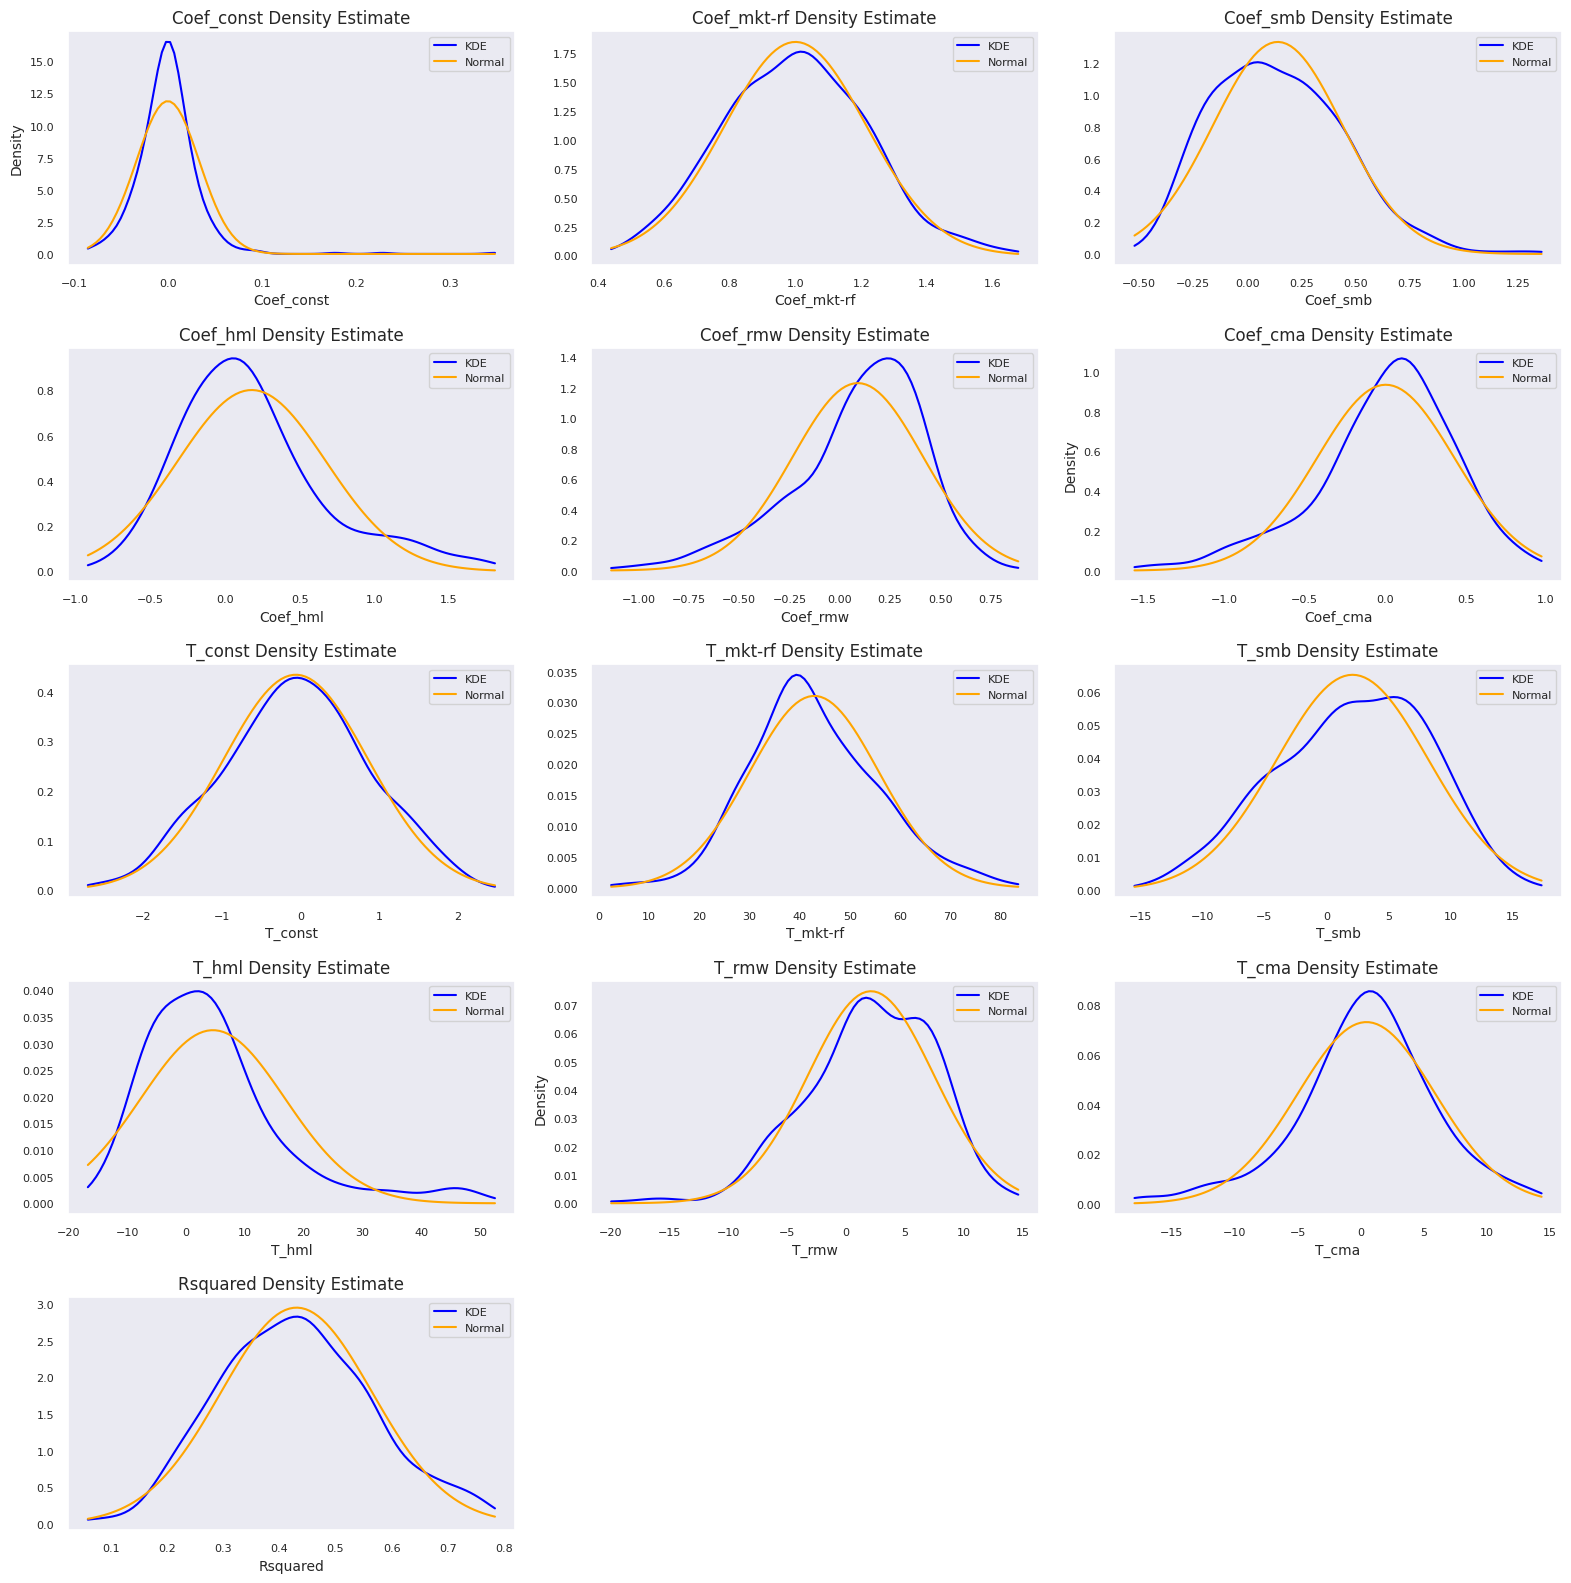

In [215]:
# Define the statistics to plot
statistics = ['coef_const', 'coef_Mkt-RF', 'coef_SMB', 'coef_HML', 'coef_RMW', 'coef_CMA',
              't_const', 't_Mkt-RF', 't_SMB', 't_HML', 't_RMW', 't_CMA', 'rsquared']

# Create a 3x5 subplot layout (3 rows, 5 columns)
fig, axs = plt.subplots(5, 3, figsize=(16, 16))

# Loop over the columns and plot the KDE and normal distribution
for i, stat in enumerate(statistics):

    # Compute the KDE for the current statistic
    kde = gaussian_kde(results_df[stat])
    x_pdf = np.linspace(results_df[stat].min(), results_df[stat].max(), 100)
    y_pdf = kde(x_pdf)
    
    # Plot the normal distribution for the current statistic
    mean = np.mean(results_df[stat])
    variance = np.var(results_df[stat])
    y_norm = norm.pdf(x_pdf, loc=mean, scale=np.sqrt(variance))
    
    # Set the current subplot axis
    ax = axs[i // 3, i % 3]
    
    # Plot the KDE and normal distribution on the current subplot axis
    ax.plot(x_pdf, y_pdf, label='KDE', color='blue')
    ax.plot(x_pdf, y_norm, label='Normal', color='orange')
    
    # Add gridlines to the plot
    ax.grid(False)
    
    # Set the title and x-label of the plot
    ax.set_title(f'{stat.capitalize()} Density Estimate', fontsize=12)
    ax.set_xlabel(stat.capitalize(), fontsize=10)
    ax.legend(loc='upper right', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=8)
    
    # Set the y-axis label on the leftmost subplots
    if i % 5 == 0:
        ax.set_ylabel('Density', fontsize=10)
    
    # Adjust the spacing between subplots
    fig.tight_layout()

# Hide empty subplots if the total number of columns is not a multiple of 5
if len(statistics) % 5 != 0:
    empty_subplots = 5 - (len(statistics) % 5)
    for i in range(1, empty_subplots + 1):
        fig.delaxes(axs[-1, -i])

# Display the plot
plt.show()

# **Question 4**
## Analysis of sectors and coefficients

In [216]:
# Creating a dataframe for all the sectors
sector_df = pd.DataFrame(columns = data.columns)

In [217]:
from tqdm import tqdm 

# Creating an empty list to add the sectors
sector_list = []

# Loop through all the stocks and get their sectors
for stock in tqdm(data.columns):
    try:
      sector_list.append(yf.Ticker(stock).info['sector'])
    except KeyError:
      sector_list.append('None')

sector_df.loc['sector',:] = sector_list

100%|██████████| 501/501 [03:41<00:00,  2.26it/s]


In [218]:
# Transpose the matrix to adjust format
sector_df = sector_df.T

# Print the dataframe
sector_df

,sector
A,Healthcare
AAL,Industrials
AAP,Consumer Cyclical
AAPL,Technology
ABBV,Healthcare
...,...
YUM,Consumer Cyclical
ZBH,Healthcare
ZBRA,Technology
ZION,Financial Services


In [219]:
# Checking to see how many companies do not have a sector associated with them
sector_df.value_counts()

sector                
Technology                74
Industrials               69
Financial Services        66
Healthcare                66
Consumer Cyclical         59
Consumer Defensive        36
Real Estate               31
Utilities                 30
Communication Services    24
Energy                    23
Basic Materials           22
None                       1
dtype: int64

In [220]:
# Making a dataframe with just the coefficients
coeff_df = results_df[['coef_const', 'coef_Mkt-RF', 'coef_SMB', 'coef_HML', 'coef_RMW', 'coef_CMA']]

# Appending sector
coeff_df = coeff_df.join(sector_df)

# Viewing dataframe
coeff_df

,coef_const,coef_Mkt-RF,coef_SMB,coef_HML,coef_RMW,coef_CMA,sector
A,-0.001773,1.148522,0.043234,-0.176370,-0.233743,0.126144,Healthcare
AAL,-0.025664,1.274175,0.835881,0.771863,0.241690,-0.354739,Industrials
AAP,-0.015446,0.842514,0.329174,0.038410,0.583611,0.039661,Consumer Cyclical
AAPL,0.025627,1.178939,-0.175058,-0.496573,0.595460,-0.023437,Technology
ABBV,0.028802,0.792061,-0.140259,-0.128023,0.081594,0.368988,Healthcare
...,...,...,...,...,...,...,...
YUM,0.008259,0.856000,-0.030305,0.042755,0.327834,0.066480,Consumer Cyclical
ZBH,-0.017895,0.861004,0.193696,0.167856,0.117278,-0.168368,Healthcare
ZBRA,0.006401,1.202621,0.417548,-0.264469,0.188004,-0.103440,Technology
ZION,-0.002032,1.051078,0.338707,1.633707,-0.552789,-0.945927,Financial Services


In [221]:
# the top 10 indexes and rsquared values
top_10 = results_df.nlargest(10, "rsquared")

# the bottom 10 indexes and rsquared values
bottom_10 = results_df.nsmallest(10, "rsquared")

# Merging sector_df with top_10 DataFrame
top_10_with_sector = top_10.merge(sector_df, left_index=True, right_index=True)
print("Top 10 Stocks based on R-squared with corresponding sectors:")
print(top_10_with_sector[["rsquared", "sector"]])

# Merging sector_df with bottom_10 DataFrame
bottom_10_with_sector = bottom_10.merge(sector_df, left_index=True, right_index=True)
print("\nBottom 10 Stocks based on R-squared with corresponding sectors:")
print(bottom_10_with_sector[["rsquared", "sector"]])

Top 10 Stocks based on R-squared with corresponding sectors:
      rsquared              sector
JPM   0.784158  Financial Services
PRU   0.779933  Financial Services
CFG   0.757060  Financial Services
AMP   0.756126  Financial Services
PNC   0.753756  Financial Services
C     0.753346  Financial Services
PFG   0.745080  Financial Services
BAC   0.742880  Financial Services
FITB  0.737185  Financial Services
MET   0.736373  Financial Services

Bottom 10 Stocks based on R-squared with corresponding sectors:
      rsquared              sector
NEM   0.058675     Basic Materials
PCG   0.074530           Utilities
KR    0.113641  Consumer Defensive
MRNA  0.117849          Healthcare
CPB   0.171047  Consumer Defensive
OGN   0.171196          Healthcare
CAG   0.174170  Consumer Defensive
CLX   0.178887  Consumer Defensive
ENPH  0.183528          Technology
AMCR  0.188188   Consumer Cyclical



**Comments**


The top 10 stocks have relatively high R-squared values, indicating a stronger relationship between their returns and the Fama-French factors. All of these stocks belong to the Financial Services sector. This suggests that the Fama-French factors, such as market risk, size, value, profitability, and investment, are significant drivers of the returns for companies in the Financial Services sector. These stocks may be more influenced by systematic risk factors and have a higher sensitivity to market movements and sector-specific factors.

The bottom 10 stocks have relatively low R-squared values, indicating a weaker relationship between their returns and the Fama-French factors. These stocks belong to various sectors, including Basic Materials, Utilities, Consumer Defensive, Healthcare, Technology, and Consumer Cyclical. The low R-squared values suggest that the Fama-French factors might not fully capture the drivers of returns for these stocks. Other factors specific to each company or sector may play a more significant role in determining their returns. It's possible that these stocks have unique characteristics or are influenced by factors not captured by the Fama-French model.

Overall, the results highlight the varying levels of explanatory power of the Fama-French factors across different stocks and sectors. The Financial Services sector, represented by the top 10 stocks, exhibits a higher level of dependence on the Fama-French factors, while the bottom 10 stocks, representing different sectors, have relatively weaker relationships with these factors. Understanding the R-squared values and sector compositions can provide insights into the extent to which the Fama-French factors explain stock returns for different companies.

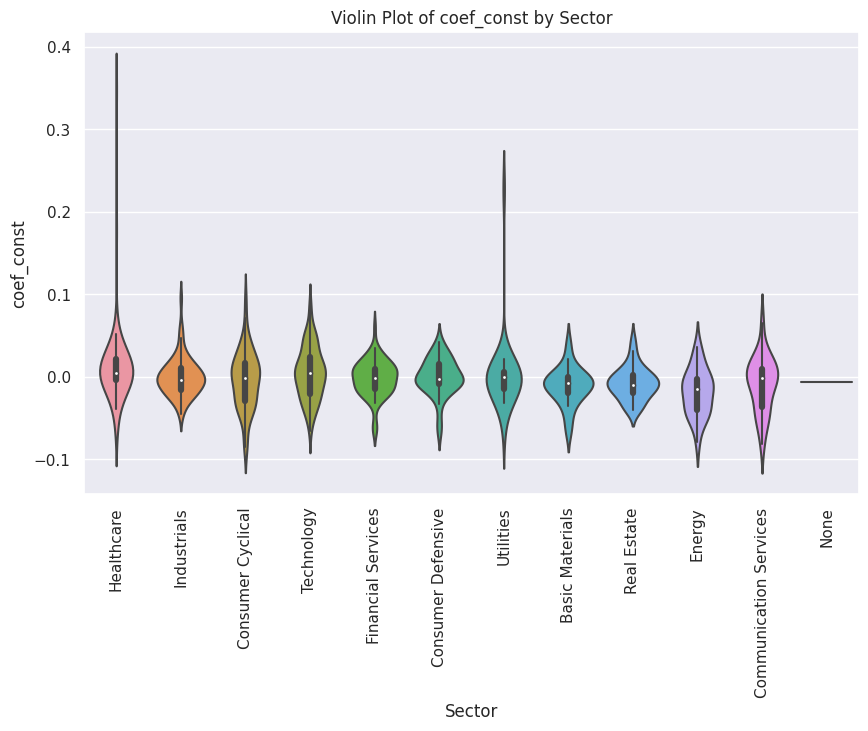

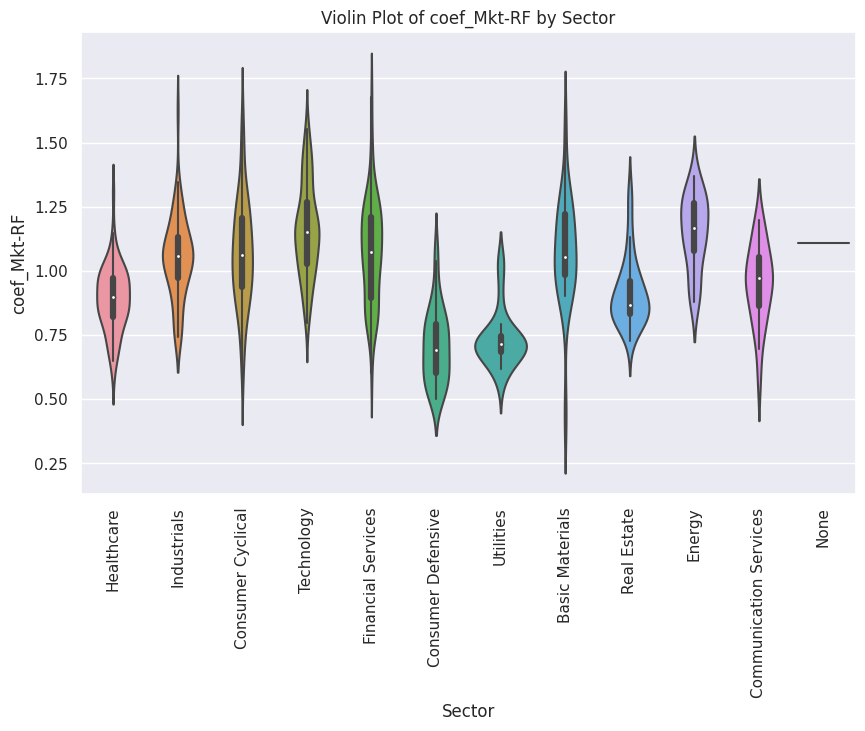

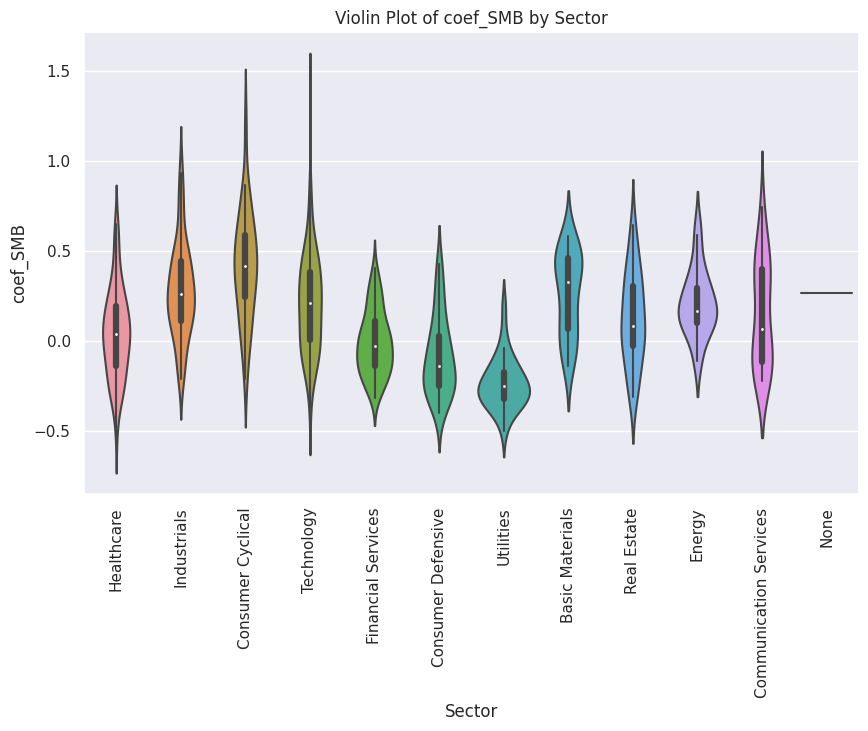

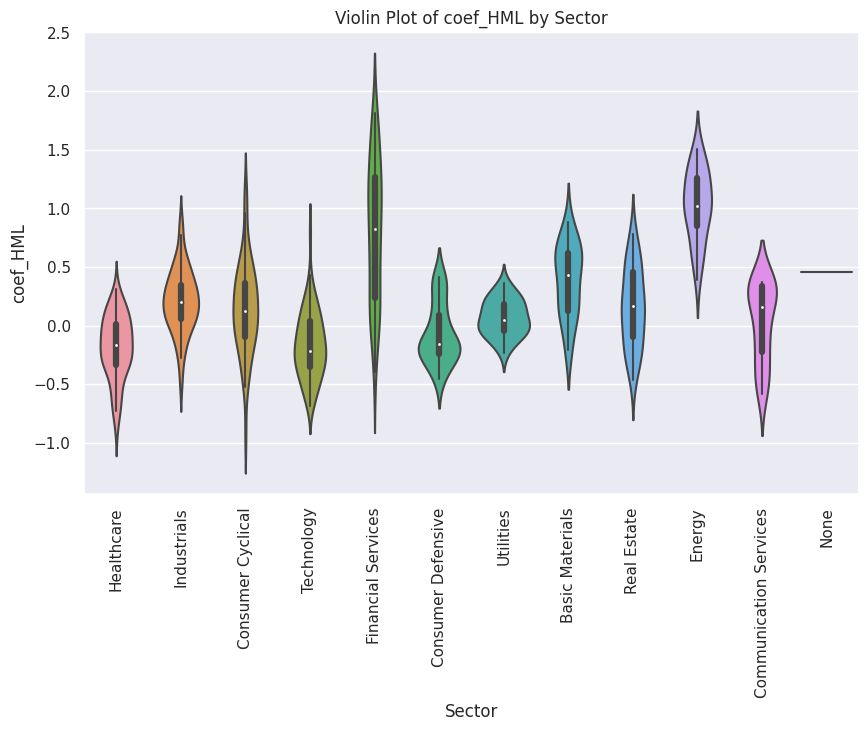

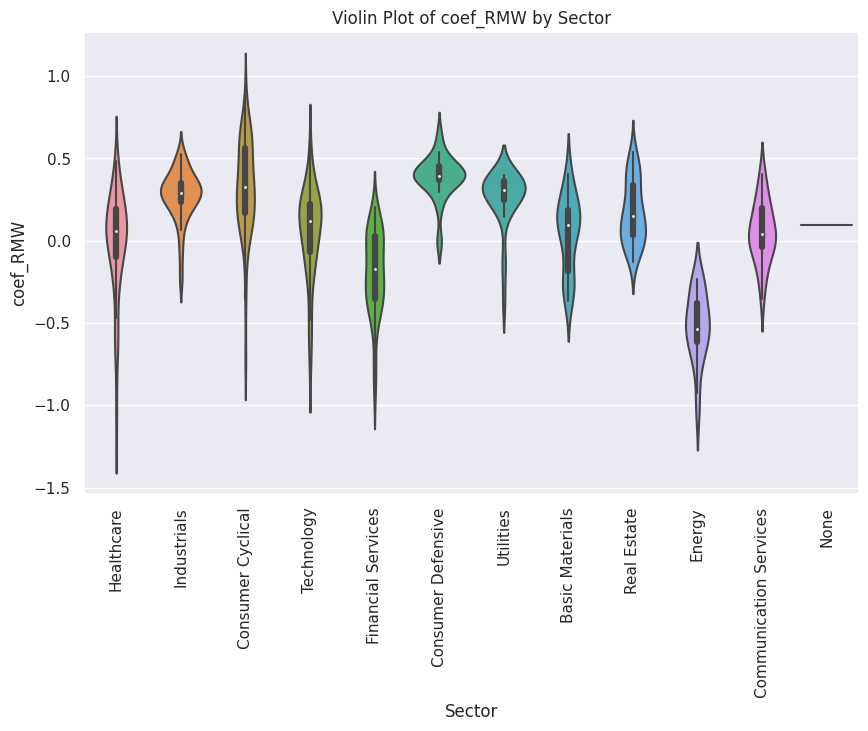

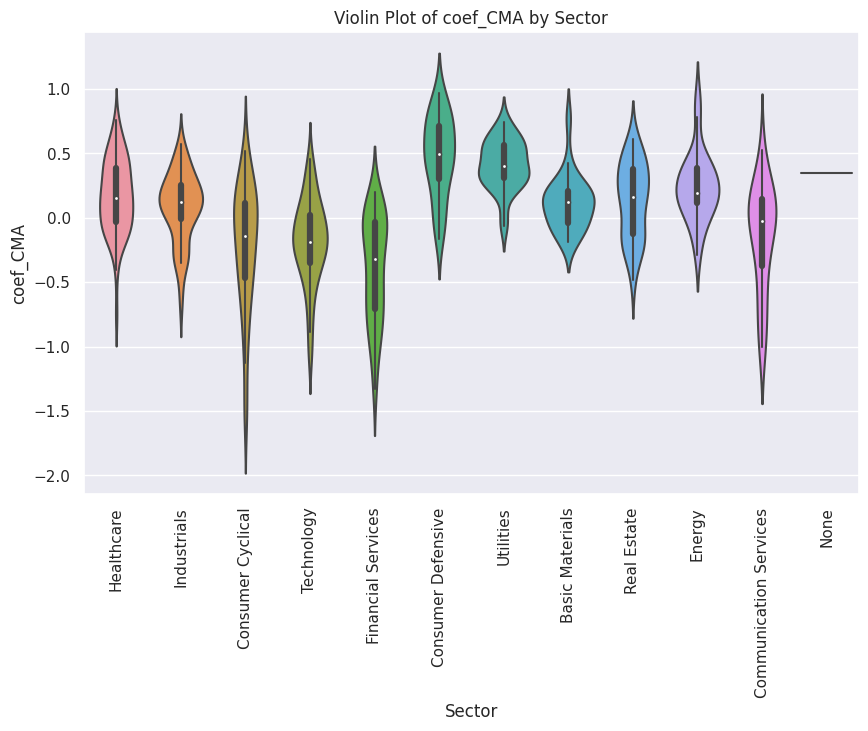

In [222]:
# List of coefficients
coefficients = ['coef_const', 'coef_Mkt-RF', 'coef_SMB', 'coef_HML', 'coef_RMW', 'coef_CMA']

# Create a violin plot for each coefficient
for coefficient in coefficients:
    plt.figure(figsize=(10, 6))
    ax = sns.violinplot(data=coeff_df, x='sector', y=coefficient)
    plt.title(f'Violin Plot of {coefficient} by Sector')
    plt.xlabel('Sector')
    plt.ylabel(coefficient)

    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    plt.show()

# **Question 5** 
## K-means clusterring

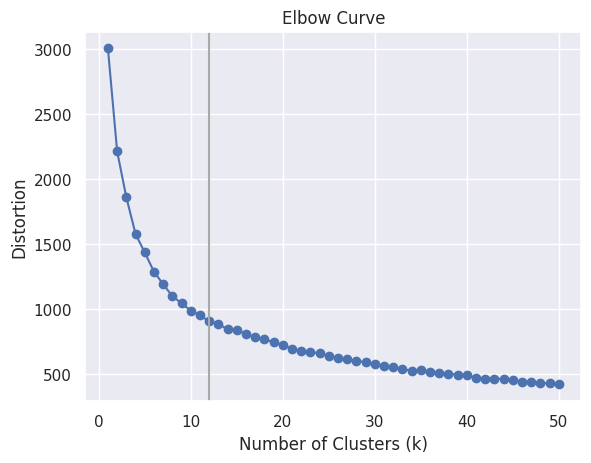

In [223]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Remove the "sector" column for clustering
features = coeff_df.drop("sector", axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
distortions = []
max_clusters = 50  # Maximum number of clusters to consider
for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)



# Plot the elbow curve
optimal_k = 12
plt.plot(range(1, max_clusters+1), distortions, marker='o')
plt.axvline(x=optimal_k, color='darkgrey')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()

In [224]:
import plotly.express as px
from sklearn.decomposition import PCA


# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(scaled_features)
cluster_labels = kmeans.labels_


# Perform PCA to reduce dimensions to 3
pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA features and cluster labels
cluster_df = pd.DataFrame({'PC1': pca_features[:, 0], 'PC2': pca_features[:, 1], 'PC3': pca_features[:, 2], 'Cluster': cluster_labels})

# Create an interactive 3D scatter plot
fig = px.scatter_3d(cluster_df, x='PC1', y='PC2', z='PC3', color='Cluster')

# Set plot layout and title
fig.update_layout(scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'),
                  title='K-means Clustering (3D PCA)')

# Show the plot
fig.show()


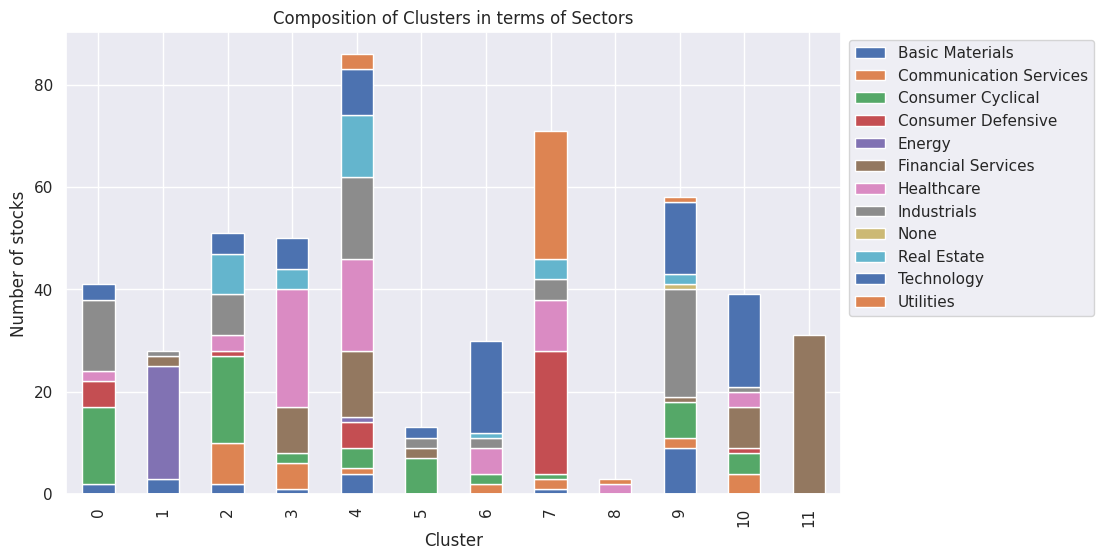

In [225]:
# Add cluster labels to the original DataFrame
coeff_df['Cluster'] = cluster_labels

# Calculate the composition of each cluster in terms of sectors
cluster_composition = coeff_df.groupby('Cluster')['sector'].value_counts().unstack().fillna(0)
cluster_composition['Total'] = cluster_composition.sum(axis=1)

# Plot the composition of clusters in terms of sectors as percentages
cluster_composition.drop('Total', axis=1, inplace=True)  # Drop the 'Total' column
cluster_composition.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Cluster')
plt.ylabel('Number of stocks')
plt.title('Composition of Clusters in terms of Sectors')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# **Question 6**

In [226]:
# Getting the values of the estimated constants from the results dataframe and sorting
alphas = results_df['coef_const'].sort_values(ascending=True)

# Getting 5 companies with highest estimated constant (last 5 elements in series)
top5 = alphas[-5:]

# Getting 5 companies with lowest estimated constant
bottom5 = alphas[:5]

In [227]:
# Displaying 5 companies with highest alpha
for ticker, value in top5.items():
    company_name = yf.Ticker(ticker).info['longName']
    print(f"Company: {company_name}, Alpha Value: {value}")

Company: Tesla, Inc., Alpha Value: 0.09392974381780334
Company: Carrier Global Corporation, Alpha Value: 0.09554655887625677
Company: Moderna, Inc., Alpha Value: 0.17746099486445224
Company: Constellation Energy Corporation, Alpha Value: 0.22766932254672895
Company: GE HealthCare Technologies Inc., Alpha Value: 0.34742386121874713


In [228]:
# Displaying 5 companies with lowest alpha
for ticker, value in bottom5.items():
    company_name = yf.Ticker(ticker).info['longName']
    print(f"Company: {company_name}, Alpha Value: {value}")

Company: Norwegian Cruise Line Holdings Ltd., Alpha Value: -0.08536242765604006
Company: DISH Network Corporation, Alpha Value: -0.0816953424668239
Company: Carnival Corporation & plc, Alpha Value: -0.08012920070219397
Company: APA Corporation, Alpha Value: -0.07858323722176355
Company: WestRock Company, Alpha Value: -0.07642767862523475


**Alpha Interpretation**

In the Fama-French model, alpha represents "excess return". It measures the investment's ability to beat the market. 


1. **High Alpha**: If the estimated alpha is high and
significantly positive, it suggests that the asset or portfolio has outperformed the expected return based on the systematic factors in the model. It implies that the asset or portfolio has generated higher returns than what would be predicted by its exposure to market risk, size, value, profitability, and investment factors. A high alpha is often interpreted as a sign of superior performance or skill in generating excess returns.


2. **Low Alpha**: Conversely, if the estimated alpha is low and significantly negative, it indicates that the asset or portfolio has underperformed the expected return based on the systematic factors. It suggests that the asset or portfolio has generated lower returns than what would be predicted by its exposure to the systematic risks in the model. A low alpha might imply that the asset or portfolio has experienced poor performance or has been unable to generate excess returns beyond what is explained by the systematic factors.

**Note**: If a given investment or portfolio manages to post stronger returns than comparable investments in the market at large, this investment has some value that an investor’s market analysis hasn’t captured. The same holds true in reverse for unexpectedly weak returns. This is expressed as the investment’s “alpha.”

# **Question 7**

In [456]:
# Resampling the data to monthly frequency
sp_df_monthly = sp_df.resample('MS').sum()

# Fixing the date column format
sp_df_monthly['Date'] = sp_df_monthly.index.to_period('M').astype(str) + '-01'

In [356]:
# Remove the additional 'Date' column
sp_df_monthly = sp_df_monthly.drop('Date', axis=1)

In [358]:
# Reading the Fama-French 5 factor daily data
ffm_df = pd.read_csv('/content/drive/MyDrive/FF_MonthlyQ7.csv')

# Renaming date column
ffm_df.columns = ['Date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']

# Dropping rows with NaN values
ffm_df = ffm_df.dropna()

In [359]:
# Fixing the date column
ffm_df['Date'] = pd.to_datetime(ffm_df['Date'], format='%Y%m') + pd.offsets.MonthBegin(1)

In [360]:
# Modifying the FF Dataframe to start from 05th January 2010
desired_date_ffm = pd.to_datetime('2009-12-15')

desired_date_ffn = pd.to_datetime('2023-03-15')

# Dropping rows where the date is above the certain_date
ffm_df = ffm_df.loc[(ffm_df['Date'] >= desired_date_ffm) & (ffm_df['Date'] <= desired_date_ffn)]

In [362]:
# Indexing the Fama-French dataframe by date
ffm_df.set_index('Date', inplace=True)

In [363]:
ffm_df['RF'] = ffm_df['RF'].astype(float)

In [364]:
# Compute excess returns
excess_returns = sp_df_monthly.sub(ffm_df['RF'], axis=0)

In [372]:
# Convert object-type columns to float64
ffm_df['Mkt-RF'] = pd.to_numeric(ffm_df['Mkt-RF'], errors='coerce')
ffm_df['SMB'] = pd.to_numeric(ffm_df['SMB'], errors='coerce')
ffm_df['HML'] = pd.to_numeric(ffm_df['HML'], errors='coerce')
ffm_df['RMW'] = pd.to_numeric(ffm_df['RMW'], errors='coerce')
ffm_df['CMA'] = pd.to_numeric(ffm_df['CMA'], errors='coerce')

In [374]:
import statsmodels.api as sm

results = []

# Create empty dictionaries for storing the results
params_dict = {}
tvalues_dict = {}


for column in excess_returns:
    Y = excess_returns[column]
    X = sm.add_constant(ffm_df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']])
    model = sm.OLS(Y, X, missing='drop')  # drop missing values
    result = model.fit()
    
    # Store the parameters and t-values in separate dictionaries
    params_dict[column] = result.params
    tvalues_dict[column] = result.tvalues
    
    # Append the results to the main list
    results.append({
        'stock': column,
        'rsquared': result.rsquared
    })

# Convert the dictionaries to dataframes
params_df = pd.DataFrame(params_dict).T
tvalues_df = pd.DataFrame(tvalues_dict).T
rsquared_df = pd.DataFrame.from_dict(results)

In [375]:
# Set index of rsquared df
rsquared_df = rsquared_df.set_index('stock')

# Rename columns
params_df.columns = ['coef_const', 'coef_Mkt-RF', 'coef_SMB', 'coef_HML', 'coef_RMW', 'coef_CMA']
tvalues_df.columns = ['t_const', 't_Mkt-RF', 't_SMB', 't_HML', 't_RMW', 't_CMA']

# Merge dataframes on index 
results_df = pd.concat([params_df, tvalues_df, rsquared_df], axis=1)
results_df

,coef_const,coef_Mkt-RF,coef_SMB,coef_HML,coef_RMW,coef_CMA,t_const,t_Mkt-RF,t_SMB,t_HML,t_RMW,t_CMA,rsquared
A,1.130114,-0.149877,0.310437,-0.218907,0.303028,0.419934,1.844510,-1.035756,1.132087,-0.866378,0.907671,1.086709,0.022935
AAL,0.880933,-0.389498,0.527934,-0.416511,-0.004718,0.993573,0.782681,-1.465248,1.048020,-0.897339,-0.007692,1.399635,0.033538
AAP,0.841906,-0.142301,-0.167523,-0.277369,-0.110954,0.152104,1.140238,-0.816028,-0.506938,-0.910916,-0.275780,0.326622,0.021130
AAPL,1.879966,-0.065955,0.293950,-0.377346,0.366411,0.166620,2.832328,-0.420732,0.989498,-1.378547,1.013092,0.398009,0.019794
ABBV,1.082930,-0.008989,-0.046950,0.146353,0.265422,0.254527,2.003211,-0.070402,-0.194050,0.656475,0.901055,0.746506,0.029544
...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,1.025268,-0.048657,0.074432,-0.341291,0.248128,0.556533,1.922658,-0.386345,0.311867,-1.551950,0.853940,1.654736,0.029145
ZBH,0.310235,-0.023568,0.184646,-0.280817,0.303940,0.753246,0.543619,-0.174859,0.722923,-1.193208,0.977417,2.092735,0.037479
ZBRA,1.609189,-0.238816,0.347405,-0.560674,-0.262807,0.681886,1.975975,-1.241660,0.953144,-1.669450,-0.592242,1.327576,0.038593
ZION,0.390281,0.065940,0.201323,-0.167756,-0.006198,0.640231,0.436843,0.312508,0.503488,-0.455317,-0.012733,1.136209,0.011695


In [376]:
# Computing statistical properties of each stock

# Mean
mean = np.mean(results_df, axis=0)

# Variance
variance = np.var(results_df)

# Skewness
skewness = pd.Series(skew(results_df, nan_policy='omit'))

# Kurtosis
kurt = pd.Series(kurtosis(results_df, nan_policy='omit'))

# Maximum and minimum
maxim = np.max(results_df,axis=0)
minim = np.min(results_df,axis=0)


# Fixing index of skewness and kurtosis to add into matrix 
skewness.index = mean.index
kurt.index = mean.index
maxim.index = mean.index
minim.index =mean.index

# Combining the statistics computed into a matrix
stats = pd.concat([mean, variance, skewness, kurt, minim, maxim], axis=1)
stats.columns = ['mean','variance','skewness','kurtosis','minimum','maximum']
stats

,mean,variance,skewness,kurtosis,minimum,maximum
coef_const,1.002961,0.376046,0.141061,0.638259,-0.799462,3.153893
coef_Mkt-RF,-0.133720,0.017046,-0.101182,1.065129,-0.727321,0.306583
coef_SMB,0.161964,0.056682,0.022554,1.341450,-0.720104,1.007027
coef_HML,-0.135761,0.069428,-0.374074,1.612931,-1.367411,0.819087
coef_RMW,0.120607,0.088788,-0.888725,3.126090,-1.628473,0.952007
coef_CMA,0.289926,0.186990,0.524054,2.447753,-1.517686,2.701395
t_const,1.658361,0.997317,-0.056018,-0.322404,-1.192326,4.574132
t_Mkt-RF,-0.924354,0.685335,0.122907,-0.171493,-3.224935,1.386937
t_SMB,0.586274,0.651301,-0.102183,0.597685,-2.084699,3.636382
t_HML,-0.464160,0.847782,0.191221,0.392435,-3.502282,2.673348


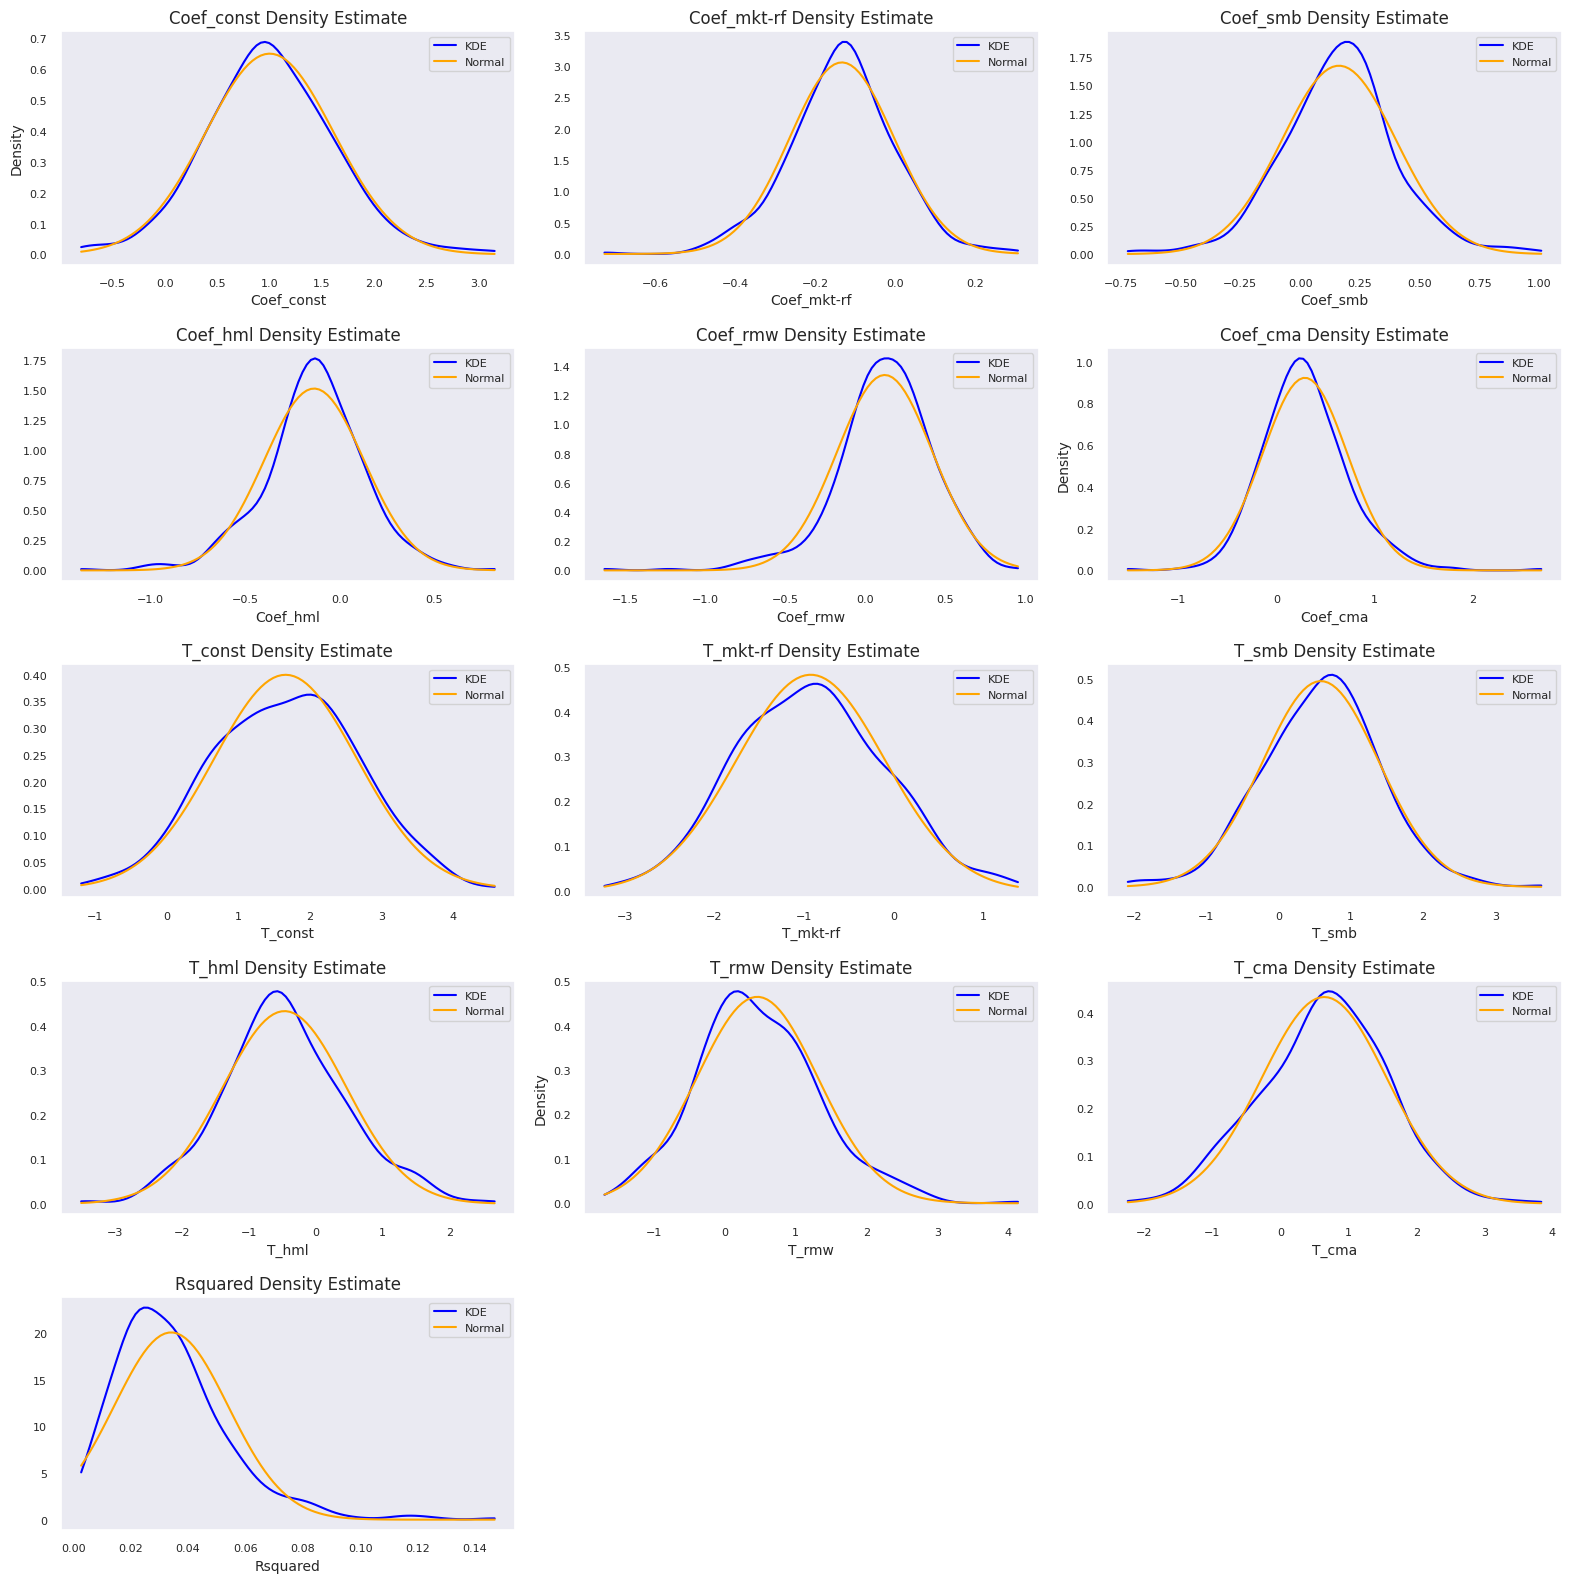

In [377]:
# Define the statistics to plot
statistics = ['coef_const', 'coef_Mkt-RF', 'coef_SMB', 'coef_HML', 'coef_RMW', 'coef_CMA',
              't_const', 't_Mkt-RF', 't_SMB', 't_HML', 't_RMW', 't_CMA', 'rsquared']

# Create a 3x5 subplot layout (3 rows, 5 columns)
fig, axs = plt.subplots(5, 3, figsize=(16, 16))

# Loop over the columns and plot the KDE and normal distribution
for i, stat in enumerate(statistics):

    # Compute the KDE for the current statistic
    kde = gaussian_kde(results_df[stat])
    x_pdf = np.linspace(results_df[stat].min(), results_df[stat].max(), 100)
    y_pdf = kde(x_pdf)
    
    # Plot the normal distribution for the current statistic
    mean = np.mean(results_df[stat])
    variance = np.var(results_df[stat])
    y_norm = norm.pdf(x_pdf, loc=mean, scale=np.sqrt(variance))
    
    # Set the current subplot axis
    ax = axs[i // 3, i % 3]
    
    # Plot the KDE and normal distribution on the current subplot axis
    ax.plot(x_pdf, y_pdf, label='KDE', color='blue')
    ax.plot(x_pdf, y_norm, label='Normal', color='orange')
    
    # Add gridlines to the plot
    ax.grid(False)
    
    # Set the title and x-label of the plot
    ax.set_title(f'{stat.capitalize()} Density Estimate', fontsize=12)
    ax.set_xlabel(stat.capitalize(), fontsize=10)
    ax.legend(loc='upper right', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=8)
    
    # Set the y-axis label on the leftmost subplots
    if i % 5 == 0:
        ax.set_ylabel('Density', fontsize=10)
    
    # Adjust the spacing between subplots
    fig.tight_layout()

# Hide empty subplots if the total number of columns is not a multiple of 5
if len(statistics) % 5 != 0:
    empty_subplots = 5 - (len(statistics) % 5)
    for i in range(1, empty_subplots + 1):
        fig.delaxes(axs[-1, -i])

# Display the plot
plt.show()

In [378]:
# Creating a dataframe for all the sectors
sector_df = pd.DataFrame(columns = data.columns)

from tqdm import tqdm 

# Creating an empty list to add the sectors
sector_list = []

# Loop through all the stocks and get their sectors
for stock in tqdm(data.columns):
    try:
      sector_list.append(yf.Ticker(stock).info['sector'])
    except KeyError:
      sector_list.append('None')

sector_df.loc['sector',:] = sector_list

# Transpose the matrix to adjust format
sector_df = sector_df.T

# Print the dataframe
sector_df

# Checking to see how many companies do not have a sector associated with them
sector_df.value_counts()

100%|██████████| 501/501 [03:39<00:00,  2.29it/s]


sector                
Technology                74
Industrials               69
Financial Services        66
Healthcare                66
Consumer Cyclical         59
Consumer Defensive        36
Real Estate               31
Utilities                 30
Communication Services    24
Energy                    23
Basic Materials           22
None                       1
dtype: int64

In [379]:
# Making a dataframe with just the coefficients
coeff_df = results_df[['coef_const', 'coef_Mkt-RF', 'coef_SMB', 'coef_HML', 'coef_RMW', 'coef_CMA']]

# Appending sector
coeff_df = coeff_df.join(sector_df)

# Viewing dataframe
coeff_df

,coef_const,coef_Mkt-RF,coef_SMB,coef_HML,coef_RMW,coef_CMA,sector
A,1.130114,-0.149877,0.310437,-0.218907,0.303028,0.419934,Healthcare
AAL,0.880933,-0.389498,0.527934,-0.416511,-0.004718,0.993573,Industrials
AAP,0.841906,-0.142301,-0.167523,-0.277369,-0.110954,0.152104,Consumer Cyclical
AAPL,1.879966,-0.065955,0.293950,-0.377346,0.366411,0.166620,Technology
ABBV,1.082930,-0.008989,-0.046950,0.146353,0.265422,0.254527,Healthcare
...,...,...,...,...,...,...,...
YUM,1.025268,-0.048657,0.074432,-0.341291,0.248128,0.556533,Consumer Cyclical
ZBH,0.310235,-0.023568,0.184646,-0.280817,0.303940,0.753246,Healthcare
ZBRA,1.609189,-0.238816,0.347405,-0.560674,-0.262807,0.681886,Technology
ZION,0.390281,0.065940,0.201323,-0.167756,-0.006198,0.640231,Financial Services


In [380]:
# the top 10 indexes and rsquared values
top_10 = results_df.nlargest(10, "rsquared")

# the bottom 10 indexes and rsquared values
bottom_10 = results_df.nsmallest(10, "rsquared")

# Merging sector_df with top_10 DataFrame
top_10_with_sector = top_10.merge(sector_df, left_index=True, right_index=True)
print("Top 10 Stocks based on R-squared with corresponding sectors:")
print(top_10_with_sector[["rsquared", "sector"]])

# Merging sector_df with bottom_10 DataFrame
bottom_10_with_sector = bottom_10.merge(sector_df, left_index=True, right_index=True)
print("\nBottom 10 Stocks based on R-squared with corresponding sectors:")
print(bottom_10_with_sector[["rsquared", "sector"]])

Top 10 Stocks based on R-squared with corresponding sectors:
      rsquared              sector
PYPL  0.146923  Financial Services
OGN   0.124986          Healthcare
VTR   0.119145         Real Estate
OTIS  0.116087         Industrials
EQT   0.112747              Energy
CMI   0.098163         Industrials
CARR  0.091278         Industrials
CVX   0.089297              Energy
VLO   0.085572              Energy
XOM   0.084943              Energy

Bottom 10 Stocks based on R-squared with corresponding sectors:
      rsquared              sector
GRMN  0.002725          Technology
HON   0.002904         Industrials
VMC   0.002952     Basic Materials
SWK   0.003615         Industrials
SCHW  0.003658  Financial Services
CPRT  0.003921   Consumer Cyclical
NVDA  0.003945          Technology
TSCO  0.005015   Consumer Cyclical
PODD  0.005399          Healthcare
CCL   0.005653   Consumer Cyclical


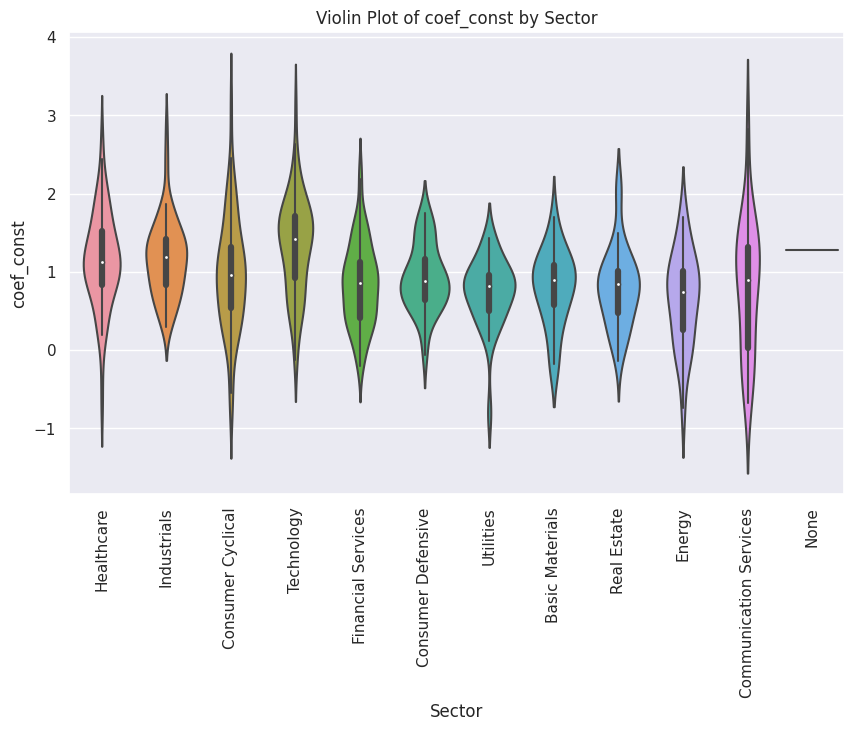

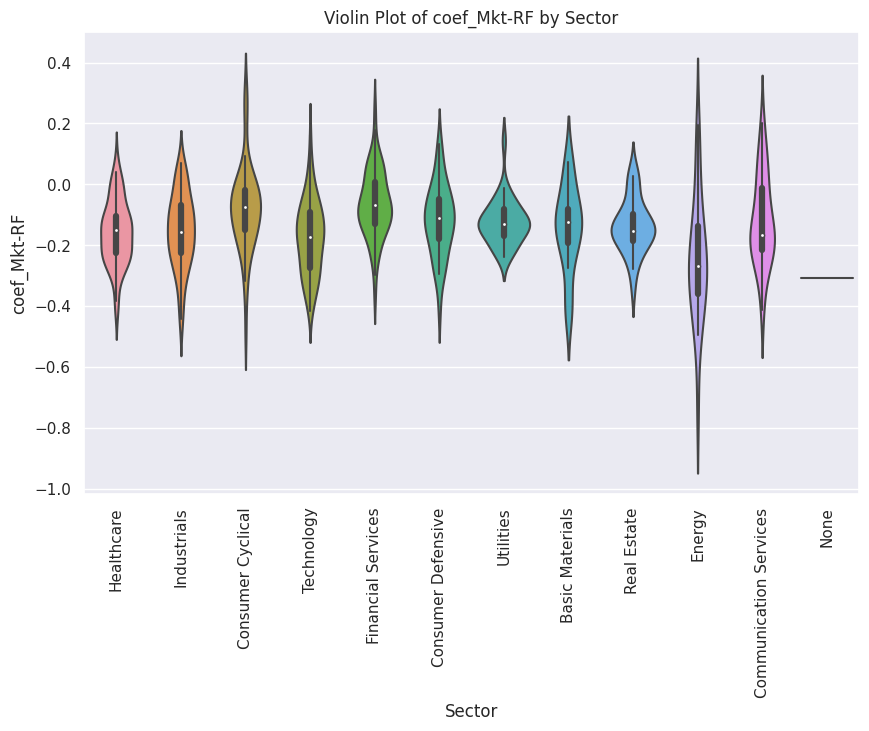

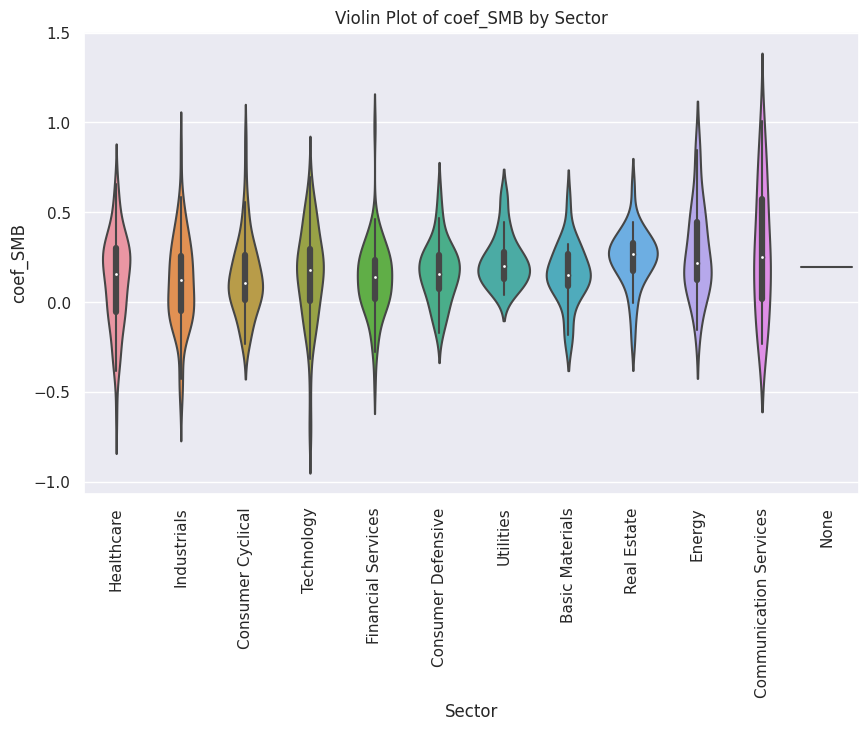

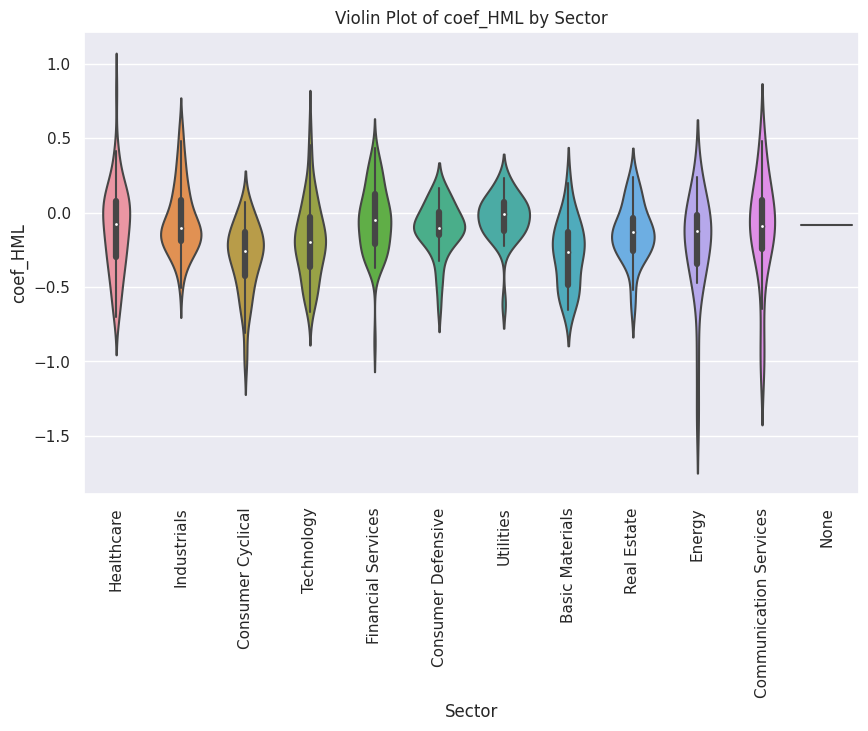

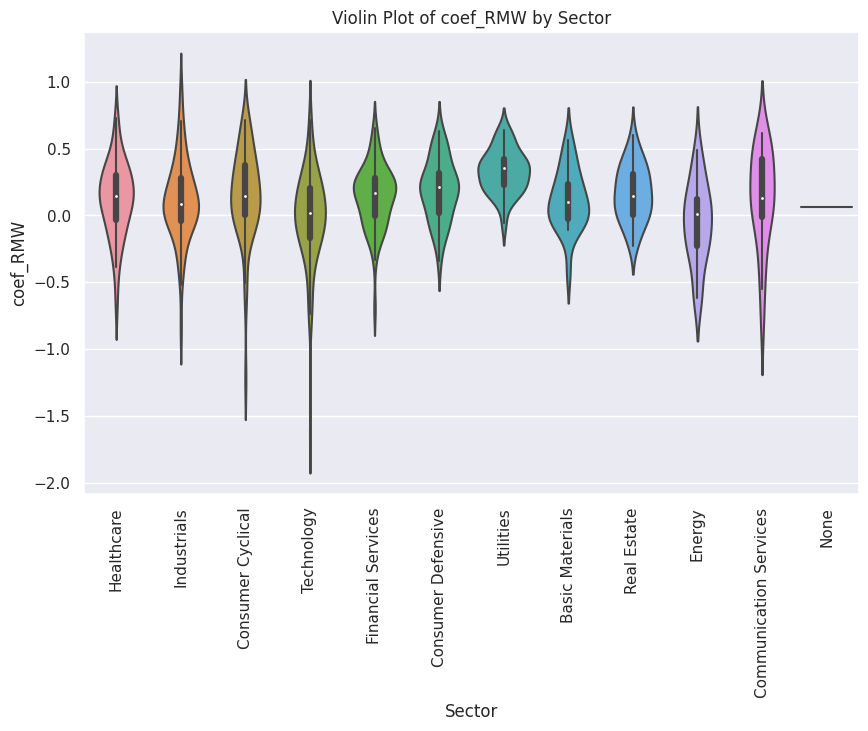

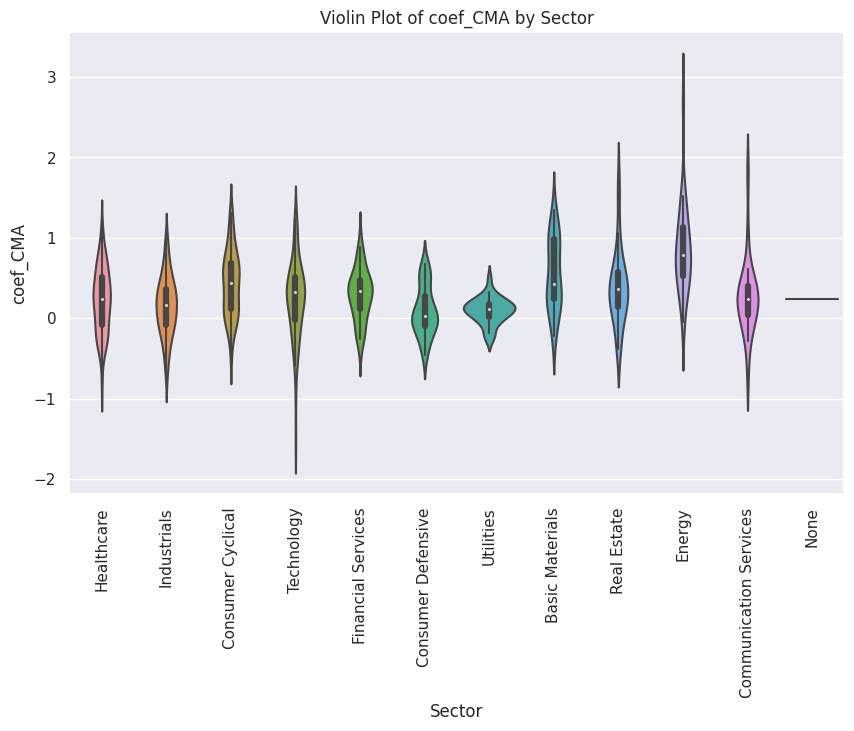

In [381]:
# List of coefficients
coefficients = ['coef_const', 'coef_Mkt-RF', 'coef_SMB', 'coef_HML', 'coef_RMW', 'coef_CMA']

# Create a violin plot for each coefficient
for coefficient in coefficients:
    plt.figure(figsize=(10, 6))
    ax = sns.violinplot(data=coeff_df, x='sector', y=coefficient)
    plt.title(f'Violin Plot of {coefficient} by Sector')
    plt.xlabel('Sector')
    plt.ylabel(coefficient)

    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    plt.show()

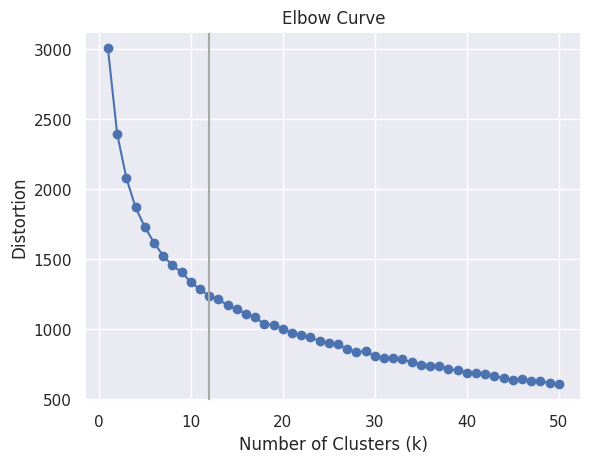

In [382]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Remove the "sector" column for clustering
features = coeff_df.drop("sector", axis=1)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
distortions = []
max_clusters = 50  # Maximum number of clusters to consider
for k in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)



# Plot the elbow curve
optimal_k = 12
plt.plot(range(1, max_clusters+1), distortions, marker='o')
plt.axvline(x=optimal_k, color='darkgrey')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()

In [383]:
import plotly.express as px
from sklearn.decomposition import PCA


# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(scaled_features)
cluster_labels = kmeans.labels_


# Perform PCA to reduce dimensions to 3
pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA features and cluster labels
cluster_df = pd.DataFrame({'PC1': pca_features[:, 0], 'PC2': pca_features[:, 1], 'PC3': pca_features[:, 2], 'Cluster': cluster_labels})

# Create an interactive 3D scatter plot
fig = px.scatter_3d(cluster_df, x='PC1', y='PC2', z='PC3', color='Cluster')

# Set plot layout and title
fig.update_layout(scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'),
                  title='K-means Clustering (3D PCA)')

# Show the plot
fig.show()

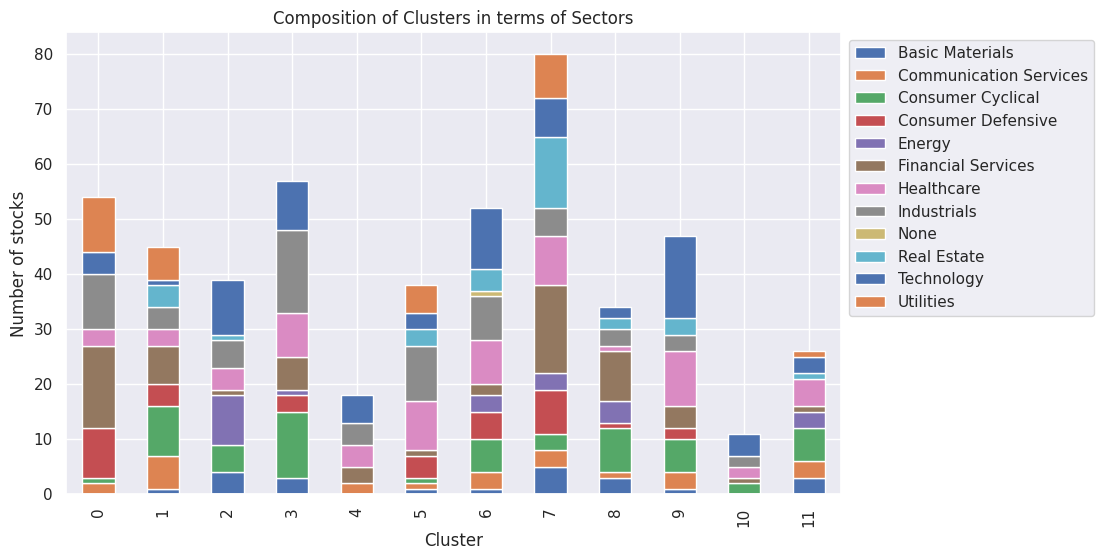

In [384]:
# Add cluster labels to the original DataFrame
coeff_df['Cluster'] = cluster_labels

# Calculate the composition of each cluster in terms of sectors
cluster_composition = coeff_df.groupby('Cluster')['sector'].value_counts().unstack().fillna(0)
cluster_composition['Total'] = cluster_composition.sum(axis=1)

# Plot the composition of clusters in terms of sectors as percentages
cluster_composition.drop('Total', axis=1, inplace=True)  # Drop the 'Total' column
cluster_composition.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Cluster')
plt.ylabel('Number of stocks')
plt.title('Composition of Clusters in terms of Sectors')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [386]:
# Getting the values of the estimated constants from the results dataframe and sorting
alphas = results_df['coef_const'].sort_values(ascending=True)

# Getting 5 companies with highest estimated constant (last 5 elements in series)
top5 = alphas[-5:]

# Getting 5 companies with lowest estimated constant
bottom5 = alphas[:5]


# Displaying 5 companies with highest alpha
for ticker, value in top5.items():
    company_name = yf.Ticker(ticker).info['longName']
    print(f"Company: {company_name}, Alpha Value: {value}")

Company: DexCom, Inc., Alpha Value: 2.7282312912721753
Company: Netflix, Inc., Alpha Value: 2.820822367081778
Company: Axon Enterprise, Inc., Alpha Value: 2.8490735818927693
Company: Enphase Energy, Inc., Alpha Value: 3.124207628761726
Company: Tesla, Inc., Alpha Value: 3.153893137212535


In [387]:
# Displaying 5 companies with lowest alpha
for ticker, value in bottom5.items():
    company_name = yf.Ticker(ticker).info['longName']
    print(f"Company: {company_name}, Alpha Value: {value}")

Company: PG&E Corporation, Alpha Value: -0.7994622766451273
Company: Carnival Corporation & plc, Alpha Value: -0.7401056904851196
Company: APA Corporation, Alpha Value: -0.7329783055672412
Company: Viatris Inc., Alpha Value: -0.7027561655450675
Company: DISH Network Corporation, Alpha Value: -0.6767164526780425


# **Question 8**

In [234]:
# Compute next day excess returns

next_day_sp_df = sp_df.shift(-1).iloc[:-1,:]
next_day_ff_df = ff_df[['RF']].shift(-1).iloc[:-1,:]
excess_returns = next_day_sp_df.sub(next_day_ff_df['RF'], axis=0)

results = []

# Create empty dictionaries for storing the results
params_dict = {}
tvalues_dict = {}

for column in excess_returns:
    Y = excess_returns[column]
    X = sm.add_constant(ff_df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].iloc[:-1,:])
    model = sm.OLS(Y, X, missing='drop')  # drop missing values
    result = model.fit()
    
    # Store the parameters and t-values in separate dictionaries
    params_dict[column] = result.params
    tvalues_dict[column] = result.tvalues
    
    # Append the results to the main list
    results.append({
        'stock': column,
        'rsquared': result.rsquared
    })

# Convert the dictionaries to dataframes
params_df = pd.DataFrame(params_dict).T
tvalues_df = pd.DataFrame(tvalues_dict).T
rsquared_df = pd.DataFrame.from_dict(results)

# Set index of rsquared df
rsquared_df = rsquared_df.set_index('stock')

# Rename columns
params_df.columns = ['coef_const', 'coef_Mkt-RF', 'coef_SMB', 'coef_HML', 'coef_RMW', 'coef_CMA']
tvalues_df.columns = ['t_const', 't_Mkt-RF', 't_SMB', 't_HML', 't_RMW', 't_CMA']

# Merge dataframes on index 
next_day_results_df = pd.concat([params_df, tvalues_df, rsquared_df], axis=1)
next_day_results_df

,coef_const,coef_Mkt-RF,coef_SMB,coef_HML,coef_RMW,coef_CMA,t_const,t_Mkt-RF,t_SMB,t_HML,t_RMW,t_CMA,rsquared
A,0.060574,-0.095631,0.123515,-0.068216,-0.003773,-0.102339,1.920073,-3.172355,2.166239,-1.258862,-0.049725,-0.983099,0.005211
AAL,0.023994,-0.000798,0.402284,-0.103481,0.597456,-0.177147,0.421881,-0.014681,3.913668,-1.059288,4.367973,-0.943958,0.008307
AAP,0.042064,-0.152474,0.070389,0.030075,0.014302,-0.166745,1.224405,-4.644739,1.133635,0.509653,0.173091,-1.470929,0.006882
AAPL,0.101999,-0.140946,0.118647,-0.083330,-0.024846,-0.100716,3.264821,-4.721440,2.101275,-1.552834,-0.330674,-0.976997,0.009229
ABBV,0.075725,-0.074822,0.121337,0.000310,0.049406,-0.085482,2.245674,-2.328884,2.037570,0.005584,0.622250,-0.801610,0.003410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
YUM,0.057222,-0.077235,0.082622,-0.133560,0.066798,0.014209,2.144979,-3.029905,1.713626,-2.914723,1.041130,0.161420,0.007180
ZBH,0.020678,0.001271,0.080962,-0.123311,0.149229,0.032671,0.723888,0.046554,1.568231,-2.513218,2.172230,0.346620,0.003238
ZBRA,0.075713,-0.100016,0.119832,-0.017176,-0.029472,-0.095498,1.925697,-2.662215,1.686367,-0.254329,-0.311679,-0.736106,0.002784
ZION,0.029693,-0.083239,0.156125,-0.063506,0.077236,-0.045835,0.744479,-2.184125,2.165835,-0.926971,0.805187,-0.348274,0.002826


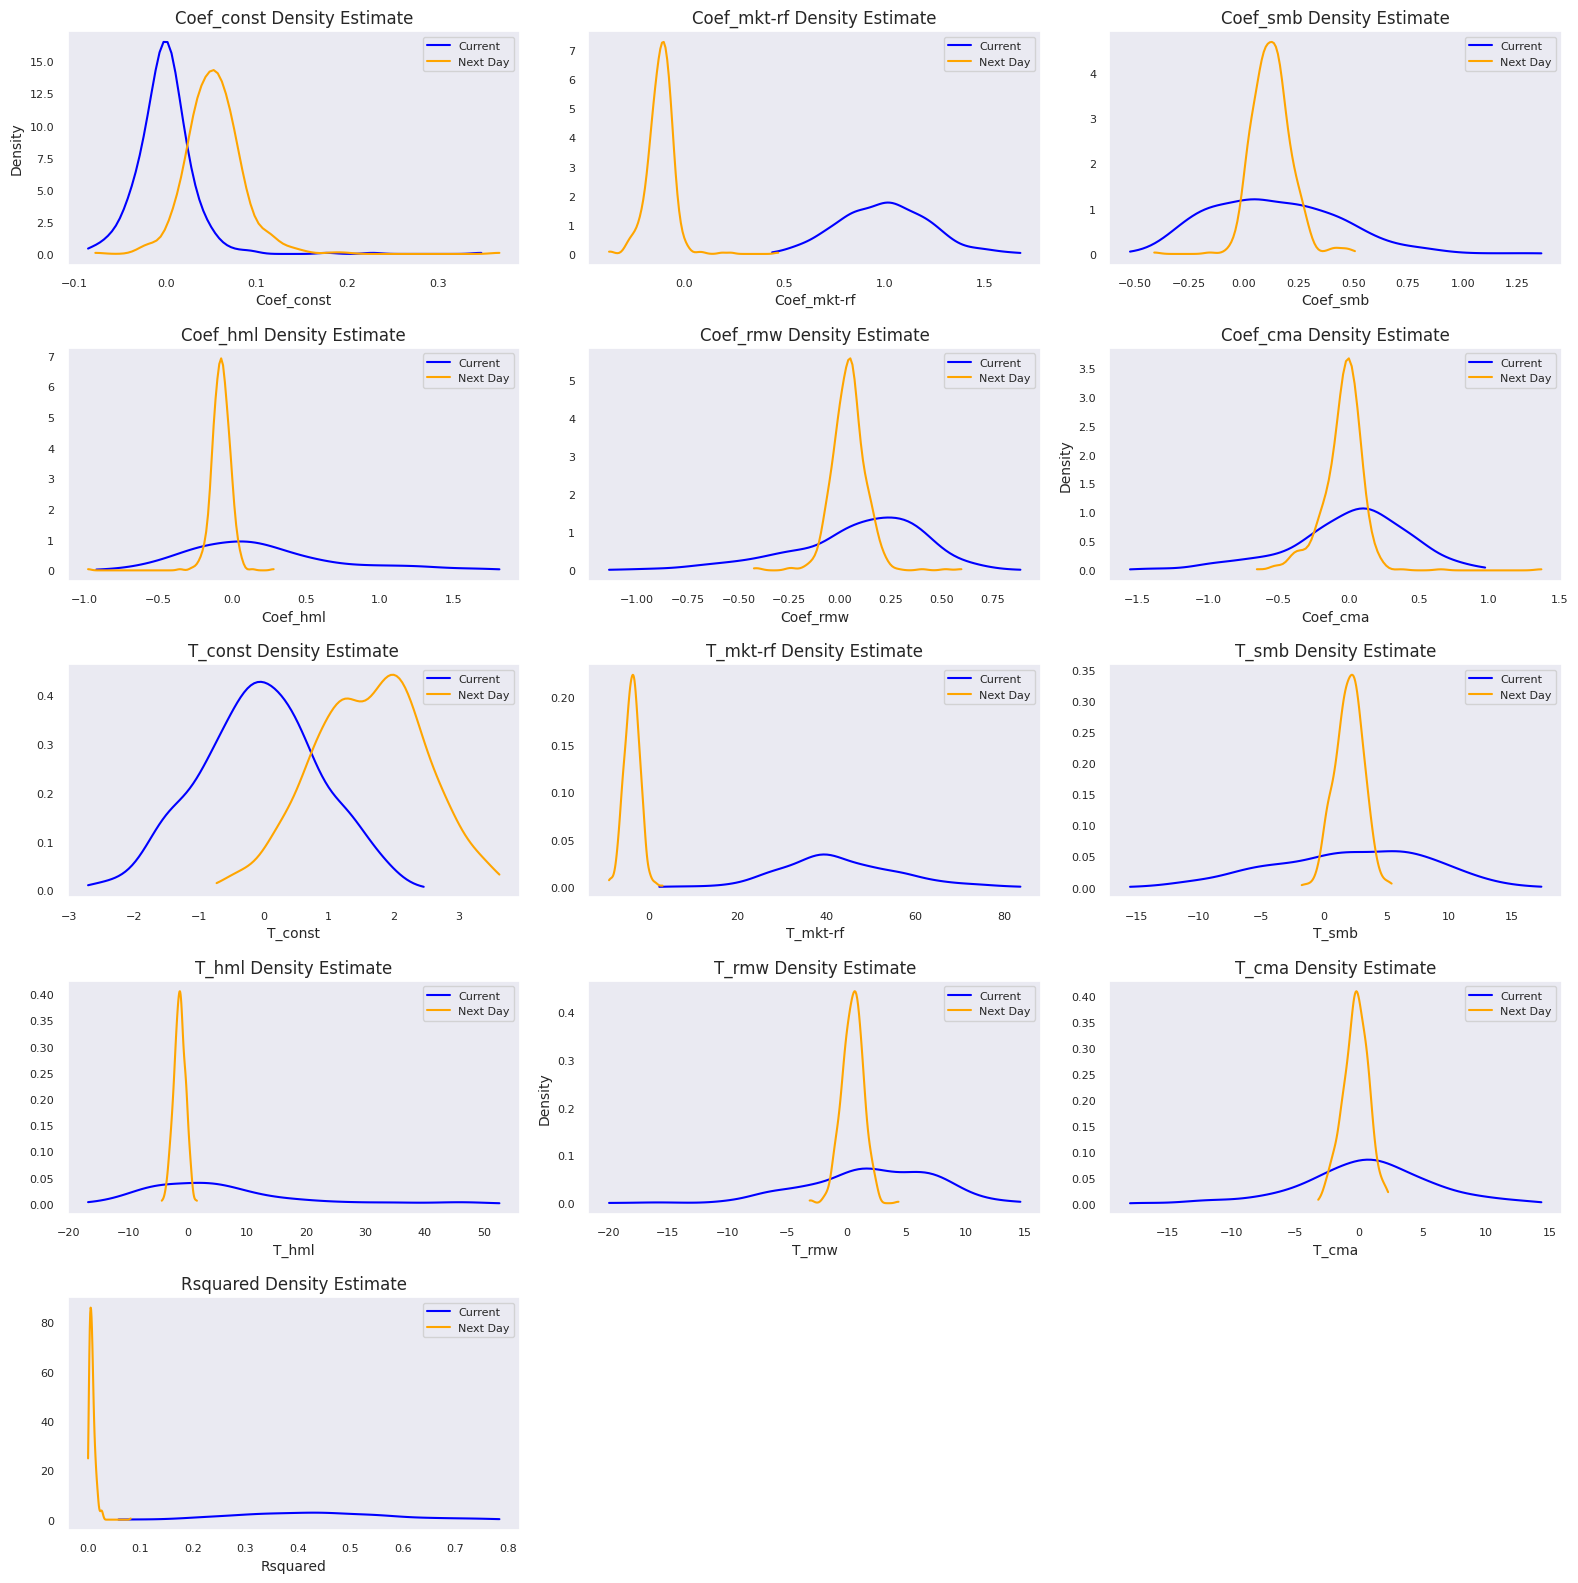

In [235]:
# Define the statistics to plot
statistics = ['coef_const', 'coef_Mkt-RF', 'coef_SMB', 'coef_HML', 'coef_RMW', 'coef_CMA',
              't_const', 't_Mkt-RF', 't_SMB', 't_HML', 't_RMW', 't_CMA', 'rsquared']

# Create a 3x5 subplot layout (3 rows, 5 columns)
fig, axs = plt.subplots(5, 3, figsize=(16, 16))

# Loop over the columns and plot the KDE and normal distribution
for i, stat in enumerate(statistics):

    # Set the current subplot axis
    ax = axs[i // 3, i % 3]

    # Compute the KDE for the current statistic
    kde = gaussian_kde(results_df[stat])
    x_pdf = np.linspace(results_df[stat].min(), results_df[stat].max(), 100)
    y_pdf = kde(x_pdf)

    # Plot the KDE and normal distribution on the current subplot axis
    ax.plot(x_pdf, y_pdf, label='Current', color='blue')
    
    # Compute the KDE for the next day statistic
    kde = gaussian_kde(next_day_results_df[stat])
    x_pdf = np.linspace(next_day_results_df[stat].min(), next_day_results_df[stat].max(), 100)
    y_pdf = kde(x_pdf)
    
    # Plot the KDE and normal distribution on the current subplot axis
    ax.plot(x_pdf, y_pdf, label='Next Day', color='orange')
    
    # Add gridlines to the plot
    ax.grid(False)
    
    # Set the title and x-label of the plot
    ax.set_title(f'{stat.capitalize()} Density Estimate', fontsize=12)
    ax.set_xlabel(stat.capitalize(), fontsize=10)
    ax.legend(loc='upper right', fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=8)
    
    # Set the y-axis label on the leftmost subplots
    if i % 5 == 0:
        ax.set_ylabel('Density', fontsize=10)
    
    # Adjust the spacing between subplots
    fig.tight_layout()

# Hide empty subplots if the total number of columns is not a multiple of 5
if len(statistics) % 5 != 0:
    empty_subplots = 5 - (len(statistics) % 5)
    for i in range(1, empty_subplots + 1):
        fig.delaxes(axs[-1, -i])

# Display the plot
plt.show()

# Question 9
## Using Xgboost regression instead of Linear regression

In [421]:
import pandas as pd
import xgboost as xgb

results = []
feature_importance = []

for column in excess_returnss:
    Y = excess_returnss[column].iloc[:-1].dropna()
    X = ff_df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].loc[Y.index].dropna()
    
    # Convert data to DMatrix format for XGBoost
    dmatrix = xgb.DMatrix(X, label=Y)
    
    # Set the parameters for XGBoost regression
    params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'seed': 42
    }
    
    # Train the XGBoost regression model
    model = xgb.train(params, dmatrix, num_boost_round=10)
    
    # Get the predictions
    predictions = model.predict(dmatrix)
    
    # Calculate the R-squared value manually
    y_mean = Y.mean()
    ss_total = ((Y - y_mean) ** 2).sum()
    ss_residual = ((Y - predictions) ** 2).sum()
    r_squared = 1 - (ss_residual / ss_total)
    
    # Get the feature importance and calculate mean
    feature_importance.append(model.get_score(importance_type='gain'))
    
    # Append the results to the main list
    results.append({
        'stock': column,
        'rsquared': r_squared
    })

# Convert the list of dictionaries to a dataframe
rsquared_dff = pd.DataFrame.from_dict(results)

rsquared_dff.head()

,stock,rsquared
0,A,0.698110
1,AAL,0.518167
2,AAP,0.448473
3,AAPL,0.663267
4,ABBV,0.507650


In [422]:
import plotly.express as px


df_feature_importance = pd.DataFrame(feature_importance)

# Melt the dataframe to convert it to long format
df_melted = df_feature_importance.melt(var_name='Feature', value_name='Importance')


# Plot the violin plot using Plotly Express
fig = px.violin(df_melted, x='Feature', y='Importance', box=True,
                color='Feature', violinmode='group')
fig.update_layout(title='Distribution of Feature Importance',
                  xaxis_title='Features',
                  yaxis_title='Importance',
                  width=800, height=600)
fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(violingap=0, violinmode='overlay')
fig.show()

In [454]:
# the top 10 indexes and rsquared values
top_10 = rsquared_dff.nlargest(10, "rsquared")
top_10.index = list(top_10["stock"])

# the bottom 10 indexes and rsquared values
bottom_10 = rsquared_dff.nsmallest(10, "rsquared")
bottom_10.index = list(bottom_10["stock"])

# Merging sector_df with top_10 DataFrame
top_10_with_sector = top_10.merge(sector_df, left_index=True, right_index=True)
print("Top 10 Stocks based on R-squared with corresponding sectors:")
print(top_10_with_sector[["rsquared", "sector"]])


# Merging sector_df with bottom_10 DataFrame
bottom_10_with_sector = bottom_10.merge(sector_df, left_index=True, right_index=True)
print("\nBottom 10 Stocks based on R-squared with corresponding sectors:")
print(bottom_10_with_sector[["rsquared", "sector"]])

Top 10 Stocks based on R-squared with corresponding sectors:
      rsquared              sector
GEHC  0.967785          Healthcare
PRU   0.846402  Financial Services
JPM   0.845457  Financial Services
CFG   0.843901  Financial Services
L     0.834800  Financial Services
LNC   0.828467  Financial Services
CEG   0.826732           Utilities
C     0.825998  Financial Services
PFG   0.823430  Financial Services
GL    0.823207  Financial Services

Bottom 10 Stocks based on R-squared with corresponding sectors:
      rsquared              sector
NEM   0.272978     Basic Materials
PCG   0.364385           Utilities
TSN   0.390920  Consumer Defensive
AMCR  0.390977   Consumer Cyclical
KR    0.393587  Consumer Defensive
MOH   0.399494          Healthcare
CBOE  0.400519  Financial Services
KDP   0.402440  Consumer Defensive
DG    0.410989  Consumer Defensive
CPB   0.419454  Consumer Defensive


### **Models Comparison**

Comparing the results obtained from the ***Farma French model*** and ***XGBoost***, we can observe some notable differences in the top and bottom stocks based on R-squared values.

**In the Farma French model:**

    The top-performing stocks are primarily from sectors such as Financial Services, Healthcare, Real Estate, Industrials, and Energy.
    PayPal Holdings (PYPL) has the highest R-squared value among the top stocks, followed by OGN in the Healthcare sector and VTR in the Real Estate sector.
    The bottom-performing stocks are mainly from sectors like Technology, Industrials, Basic Materials, Financial Services, and Consumer Cyclical.

**In the XGBoost model:**

    The top-performing stocks are predominantly from the Financial Services sector, with several companies showing high R-squared values.
    Healthcare stocks also perform well in this model, with GE Healthcare (GEHC) having the highest R-squared value.
    The bottom-performing stocks are spread across sectors such as Basic Materials, Utilities, Consumer Defensive, and Consumer Cyclical.

It is important to note that different models may yield different results due to variations in their algorithms, input data, and assumptions. The variations in the top and bottom stocks between the Farma French model and XGBoost indicate differences in the models' methodologies and the factors they consider significant for predicting stock performance.

Investors should exercise caution and not rely solely on R-squared values when making investment decisions. Other factors, such as financial statements, market trends, company news, and qualitative analysis, should be considered for a comprehensive evaluation of potential investments.